<h1>Análise de dados criminais do Estado de São Paulo  2024 </h1> 
Autor: <a href=https://www.linkedin.com/in/mailson-p-92909928a/> Mailson Vieira Passos <a/>

<hr>

<h2><span id='Objetivo'>Objetivo</span></h2>
<ul>
    <li>Coletar dados da Criminais no site <a href='https://www.ssp.sp.gov.br/estatistica/consultas'>SSP-SP</a></li>
    <li>Fazer transformações e limpeza necessárias</li>
    <li>Explorar os dados/análise exploratória</li>
</ul>

<hr>
<h2>Requisitos</h2>
O que eu estou usando:

```python
!pip install duckdb==1.1.2
!pip install pandas==2.0.0
!pip install numpy==1.26.1
!pip install seaborn==0.13.2
!pip install geopandas==8.1.10.14.1
```
<hr>

<h2>Sobre os dados</h2>

Os dados podem ser obtidos no endereço da <a href = "https://www.ssp.sp.gov.br/estatistica/consultas">SSP</a>, escolhendo 2024. No arquivo, adicionalmente, incluí a coluna HORA_OCORRENCIA_BO_TEXTO com horas no formato texto que será explicado mais adiante.


<table>
    <thead>
        <tr>
            <th>Variável</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>NOME_DEPARTAMENTO</th>
            <td>Departamento responsável pelo registro.</td>
        </tr>
        <tr>
            <th>NOME_SECCIONAL</th>
            <td>Delegacia Seccional responsável pelo registro.</td>
        </tr>
        <tr>
            <th>NOME_DELEGACIA</th>
            <td>Delegacia responsável pelo registro. </td>
        </tr>
        <tr>
            <th>NOME_MUNICIPIO</th>
            <td>Cidade de registro. </td>
        </tr>
        <tr>
            <th>NUM_BO</th>
            <td>Número do boletim de ocorrência. </td>
        </tr>
        <tr>
            <th>ANO_BO</th>
            <td>Ano do boletim de ocorrência</td>
        </tr>
        <tr>
            <th>DATA_REGISTRO</th>
            <td>Data em que o B.O foi registrado</td>
        </tr>
        <tr>
            <th>DATA_OCORRENCIA_BO</th>
            <td>Data do acontecimento dos fatos. </td>
        </tr>
        <tr>
            <th>HORA_OCORRENCIA_BO</th>
            <td>Data do acontecimento dos fatos. </td>
        </tr>
        <tr>
            <th>DESC_PERIODO</th>
            <td>Descrição do período em que os fatos ocorreram. </td>
        </tr>
        <tr>
            <th>DESCR_SUBTIPOLOCAL</th>
            <td>Descrição do local onde se deu os fators. </td>
        </tr>
        <tr>
            <th>BAIRRO</th>
            <td>Bairro da ocorrência. </td>
        </tr>
        <tr>
            <th>LOGRADOURO</th>
            <td>Logradouro dos fatos. </td>
        </tr>
        <tr>
            <th>NUMERO_LOGRADOURO</th>
            <td>Número do Logradouro dos fatos. </td>
        </tr>
        <tr>
            <th>LATITUDE</th>
            <td>Latitude da Ocorrência. </td>
        </tr>
        <tr>
            <th>LONGITUDE</th>
            <td>Longitude da Ocorrência. </td>
        </tr>
        <tr>
            <th>NOME_DELEGACIA_CIRCUNSCRIÇÃO</th>
            <td>Delegacia de Circunscrição</td>
        </tr>
        <tr>
            <th>NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO</th>
            <td>Departamento de Circunscrição. </td>
        </tr>
        <tr>
            <th>NOME_SECCIONAL_CIRCUNSCRIÇÃO</th>
            <td>Seccional de Circunscrição . </td>
        </tr>
        <tr>
            <th>NOME_MUNICIPIO_CIRCUNSCRIÇÃO</th>
            <td>Município da delegacia de Circunscrição. </td>
        </tr>
        <tr>
            <th>RUBRICA</th>
            <td>Natureza jurídica da ocorrência</td>
        </tr>
        <tr>
            <th>DESCR_CONDUTA</th>
            <td>Tipo de local ou circunstância que qualifica a ocorrência. </td>
        </tr>
        <tr>
            <th>NATUREZA_APURADA</th>
            <td>Classificação apurada do crime</td>
        </tr>
        <tr>
            <th>MES_ESTATISTICA</th>
            <td>Mês em que a ocorrência consta na estatística. </td>
        </tr>
        <tr>
            <th>ANO_ESTATISTICA</th>
            <td>Ano em que a ocorrência consta na estatística. </td>
        </tr>
    </tbody>
</table>
O dicionário acima foi criado usando o dicionário de outros arquivos contidos no mesmo link. O arquivo original não possui dicionário. 

Algumas informações a serem consideradas:  
Circunscrição é a área geográfica atendida por um algum serviço público. No caso da delegacia de circunscrição é a delegacia que atua na região do ocorrido. A estrutura da polícia possui divisões que compõe uma hierarquia. Um departamento coordena diversas seccionais e/ou delegacias especializadas e unidades diversas de uma determinada região (circunscrição). A função de um departamento pode depende de sua especificidade, mas no caso do DECAP (atua na capital), DEINTER (atua no interior) e DEMACRO (atua na macro região de São Paulo, i.e. municípios que conurbam a capital), eles têm por atribuição exercício, nas áreas territoriais respectivas, das atividades de polícia judiciária, administrativa e preventiva especializada, de atribuição das unidades policiais de base territorial. Uma seccional é responsável por orientar, fiscalizar e executar as atividades de polícia judiciária, administrativa e preventiva especializada, além de movimentar presos entre municípios da área ou de região limítrofe. Já uma delegacia possui mais divisões, como por exemplo, classes que correspondem ao número de habitantes de um município que uma delegacia abrange. As delegacias de municípios têm por obrigação atender a todas as ocorrências policiais, executar as atividades de polícia judiciária, preventiva especializada e administrativa afim, solicitar, quando necessária, a intervenção de Departamentos de Polícia Especializada, para a apuração de infração penal de suas atribuições.


Referências
<ul>
    <li> <a href = 'http://perfil.sp.gov.br/site/legislacaoi.asp?atoid=20495'>Departamentos do interior e outros, criação</a></li>
    <li> <a href = 'https://www.al.sp.gov.br/repositorio/legislacao/lei/1958/lei-4984-20.11.1958.html'>Circunscrição das delegacias da capital, criação</a></li>
    <li> <a href = 'https://www.al.sp.gov.br/repositorio/legislacao/decreto/1969/decreto-52213-24.07.1969.html'>Estrutura da Secretaria de Segurança Pública, 1989</li>
    <li> <a href = 'http://www.legislacao.sp.gov.br/legislacao/dg280202.nsf/5aeda0f13cd3be5f83256c1e00423b1d/8285ccd7f8f123dd032571c6004addae?OpenDocument'>DEINTER</a></li>
    <li> <a href = "https://www.policiacivil.sp.gov.br/portal/faces/pages_home/institucional/departamentosOrgaos?_afrLoop=3061734785621994%26_afrWindowMode=0%26_afrWindowId=1i55v76lk_122#!%40%40%3F_afrWindowId%3D1i55v76lk_122%26_afrLoop%3D3061734785621994%26_afrWindowMode%3D0%26_adf.ctrl-state%3D1i55v76lk_251">Funções e Competências dos Departamentos</a></li>
    <li> <a href = 'https://sesp.es.gov.br/Not%C3%ADcia/decap-passa-a-funcionar-em-novo-local'>DECAP, referência de outro estado</a></li>  
    <li> <a href = 'https://pt.wikipedia.org/wiki/Pol%C3%ADcia_Civil_do_Estado_de_S%C3%A3o_Paulo'>Estrutura da Polícia Civil do Estado de São Paulo, wikipedia</a></li>  
</ul>

Para trabalhar com os dados vamos utilizar duckdb que é uma <a href= "https://en.wikipedia.org/wiki/Online_analytical_processing">OLAP</a> DBMS que utiliza SQL para consulta. Além disso ela suporta o processamento de dados espaciais graças a uma integração com as bibliotecas GEOS, GDAL e PROJ.

In [1]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd

Vamos trabalhar somente com os dados na memória.

In [2]:
con = duckdb.connect()

In [3]:
file = 'dados_criminais/SPDadosCriminais_2024.xlsx'

Para lermos o arquivo acima é necessário utilizarmos a extensão gdal, já que não há implementação nativa para a leitura de um arquivo excel. Por outro lado, a leitura do arquivo utilizando gdal demora aproximadamente 1 minuto e meio para mim, enquanto que, usando pandas, passou de 5 minutos.

In [4]:
con.sql(f'''
    install spatial;
    load spatial;
    create or replace table dados_criminais_pt1 as
        select row_number() over () as ID, * from st_read(
            '{file}',
            layer = 'JAN-JUN_2024',
            open_options = ['HEADERS=FORCE'​]);
    '''
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [5]:
max_id = con.sql(f'''
    select max(ID) as NEXT_ID
    from dados_criminais_pt1
    '''
).fetchnumpy()

In [6]:
con.sql(f'''
    create or replace table dados_criminais_pt2 as
        select {max_id['NEXT_ID'][0]} + row_number() over () as ID, * from st_read(
            '{file}',
            layer = 'JUL-NOV_2024',
            open_options = ['HEADERS=FORCE'​]
        );
    '''
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Criei também um identificador único chamado ID pois, nos dados, não temos ele.

In [7]:
con.sql(f'''
    show tables;
    '''
)

┌─────────────────────┐
│        name         │
│       varchar       │
├─────────────────────┤
│ dados_criminais_pt1 │
│ dados_criminais_pt2 │
└─────────────────────┘

Os dados foram divididos em duas planilhas, sendo uma para cada semestre. Vamos unir em um só dataset.

In [8]:
con.sql(f'''
    create or replace table dados_criminais as (
        select * from (
            select * from dados_criminais_pt1
            union
            select * from dados_criminais_pt2
        )
        order by ID
    );
    '''
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [9]:
con.sql(f'''
    show tables;
    '''
)

┌─────────────────────┐
│        name         │
│       varchar       │
├─────────────────────┤
│ dados_criminais     │
│ dados_criminais_pt1 │
│ dados_criminais_pt2 │
└─────────────────────┘

Note que a extensão gdal além de ler os dados também atua na interpretação dos tipos de cada coluna antes do duckdb construir a tabela. Vamos checar os tipos detectados.

In [10]:
con.sql(f'''
    select column_name, data_type
    from information_schema.columns
    where table_name = 'dados_criminais';
    '''
).df()

,column_name,data_type
0,ID,BIGINT
1,NOME_DEPARTAMENTO,VARCHAR
2,NOME_SECCIONAL,VARCHAR
3,NOME_DELEGACIA,VARCHAR
4,NOME_MUNICIPIO,VARCHAR
5,ANO_BO,INTEGER
6,NUM_BO,VARCHAR
7,DATA_REGISTRO,DATE
8,DATA_OCORRENCIA_BO,DATE
9,HORA_OCORRENCIA_BO,VARCHAR


Com exceção da coluna HORA_OCORRENCIA_BO, LATITUDE e LONGITUDE, todos os tipos são adequados. No caso de NUMERO_LOGRADOURO, como pode haver a possibilidade de ter letras acompanhando o número, deixamos como varchar, mas checaremos se é o caso. Para a coluna HORA_OCORRENCIA_BO, deveríamos ter dados tipo TIME, enquanto LATITUDE E LONGITUDE deveriam ser FLOAT. Vamos olhar HORA_OCORRENCIA_BO.

In [11]:
con.sql(f'''
    select HORA_OCORRENCIA_BO from dados_criminais
    limit 5;
    '''
).df()

,HORA_OCORRENCIA_BO
0,NULL
1,0.8125
2,0.95833333333333337
3,0.95833333333333337
4,1.3888888888888888E-2


Temos valores nulos e os dados foram transformados em números no formato texto. Infelizmente, isso ocorre pois o gdal não consegue interpretar tipo time. Por isso adicionei uma coluna com as horas como tipo text para preservar os dados, pois não consigo retornar os números acima para horas.

In [12]:
con.sql(f'''
    select HORA_OCORRENCIA_BO_TEXTO from dados_criminais
    limit 5;
    '''
).df()

,HORA_OCORRENCIA_BO_TEXTO
0,NULL
1,19:30:00
2,23:00:00
3,23:00:00
4,00:20:00


Vamos alterar a string 'NULL' para null.

In [13]:
con.sql(f'''
    update dados_criminais
    set HORA_OCORRENCIA_BO_TEXTO = null
    where HORA_OCORRENCIA_BO_TEXTO = 'NULL';
    '''
)

Convertemos a coluna para tipo TIME.

In [14]:
con.sql(f'''
    alter table dados_criminais
    alter column HORA_OCORRENCIA_BO_TEXTO type TIME;
    '''
)

Podemos excluir a coluna 'HORA_OCORRENCIA_BO'

In [15]:
con.sql(f'''
    alter table dados_criminais
    drop column HORA_OCORRENCIA_BO;
    '''
)

e renomear a coluna 'HORA_OCORRENCIA_BO_TEXTO' para 'HORA_OCORRENCIA_BO'

In [16]:
con.sql(f'''
    alter table dados_criminais
    rename HORA_OCORRENCIA_BO_TEXTO to HORA_OCORRENCIA_BO;
    '''
)

Novamente olhamos as colunas.

In [17]:
def tab_overview(table: str) -> pd.DataFrame:
    '''
    Mostra informações de uma tabela como colunas, tipos
    '''
    tab_df = con.sql(f'''
        select *
        from pragma_table_info({table});
        '''
    ).df()
    return tab_df
    
tab_overview('dados_criminais')

,cid,name,type,notnull,dflt_value,pk
0,0,ID,BIGINT,False,None,False
1,1,NOME_DEPARTAMENTO,VARCHAR,False,None,False
2,2,NOME_SECCIONAL,VARCHAR,False,None,False
3,3,NOME_DELEGACIA,VARCHAR,False,None,False
4,4,NOME_MUNICIPIO,VARCHAR,False,None,False
5,5,ANO_BO,INTEGER,False,None,False
6,6,NUM_BO,VARCHAR,False,None,False
7,7,DATA_REGISTRO,DATE,False,None,False
8,8,DATA_OCORRENCIA_BO,DATE,False,None,False
9,9,DESC_PERIODO,VARCHAR,False,None,False


Como vimos, a coluna possui string NULL, por isso vamos ver em quais colunas e quantas ocorrências em cada.

In [18]:
def db_checkstr_incols(string: str) -> pd.DataFrame:
    '''
    Quantidade de string em cada coluna da tabela
    '''
    slct_cols = con.sql(f'''
        select name
        from pragma_table_info(dados_criminais)
        where type = 'VARCHAR';
        '''
    ).fetchnumpy()['name']
    
    res = {}
    for col in slct_cols:
        col_res = con.sql(f'''
            select count({col}) as '{col}'
            from dados_criminais
            where {col} = 'NULL';
            '''
        ).fetchnumpy()
        res.update(col_res)

    res = pd.DataFrame(res).T
    col_name = f'Quantidade de string {string}'
    res.columns = [col_name]
    res['RelFreq'] = np.round(res[col_name] / (res[col_name].sum() + 1e-16) * 100, 2)
    
    return res[res[col_name] > 0].sort_values(col_name, ascending = False)

In [19]:
db_checkstr_incols('NULL')

,Quantidade de string NULL,RelFreq
DESC_PERIODO,770516,59.23
DESCR_CONDUTA,287834,22.13
LATITUDE,115171,8.85
LONGITUDE,115171,8.85
DESCR_SUBTIPOLOCAL,11741,0.90
BAIRRO,340,0.03
RUBRICA,3,0.00
NUMERO_LOGRADOURO,2,0.00
LOGRADOURO,1,0.00


Mais de 80% estão nas colunas de descrição, o que revela uma dificuldade na obtenção de dados mais detalhados. A string NULL aqui é utilizada no lugar de valores ausentes. No entanto, em sql temos o valor null. Vamos checá-los. 

In [20]:
def db_checknull_incols(table) -> pd.DataFrame:
    '''
    Quantidade de valores nulos por coluna na tabela
    '''
    slct_cols = con.sql(f'''
        select name
        from pragma_table_info({table});
        '''
    ).fetchnumpy()['name']
    
    res = {}
    for col in slct_cols:
        col_res = con.sql(f'''
            select count(*) - count({col}) as '{col}'
            from {table}
            '''
        ).fetchnumpy()
        res.update(col_res)

    res = pd.DataFrame(res).T
    col_name = f'Quantidade de null'
    res.columns = [col_name]
    res['RelFreq'] = np.round(res[col_name] / (res[col_name].sum() + 1e-16) * 100, 2)
    
    return res[res[col_name] > 0].sort_values(col_name, ascending = False)

In [21]:
db_checknull_incols('dados_criminais')

,Quantidade de null,RelFreq
HORA_OCORRENCIA_BO,322128,62.74
NUMERO_LOGRADOURO,175574,34.20
BAIRRO,15695,3.06


Note que NUMERO_LOGRADOURO e BAIRRO possuem valores nulls e string NULL. Vamos checar se há letras.

In [22]:
con.sql(f'''
    select NUMERO_LOGRADOURO
    from dados_criminais
    where NUMERO_LOGRADOURO similar to '^.*[a-zA-Z].*'
    '''
)

┌───────────────────┐
│ NUMERO_LOGRADOURO │
│      varchar      │
├───────────────────┤
│ NULL              │
│ NULL              │
└───────────────────┘

Somente temos as duas strings NULLs.

Como não temos letras nos numeros, vamos trocar a string NULL por null. No caso de Bairro, como é string, vamos manter os nulls como string NULL por enquanto.

In [23]:
con.sql(f'''
    update dados_criminais
    set NUMERO_LOGRADOURO = null
    where NUMERO_LOGRADOURO == 'NULL';
    update dados_criminais
    set BAIRRO = 'NULL'
    where BAIRRO is null;
    '''
)

Voltando a para corrigir os tipos dos dados, vimos que longitude e latitude possuem a string NULL.

In [24]:
con.sql(f'''
    select LONGITUDE, LATITUDE
    from dados_criminais
    where LONGITUDE = 'NULL'
    or LATITUDE = 'NULL'
    '''
).df()

,LONGITUDE,LATITUDE
0,NULL,NULL
1,NULL,NULL
2,NULL,NULL
3,NULL,NULL
4,NULL,NULL
...,...,...
115166,NULL,NULL
115167,NULL,NULL
115168,NULL,NULL
115169,NULL,NULL


Aparentemente toda linha em que longitude é nula, latitude também é.

In [25]:
df = con.sql(f'''
    select LONGITUDE, LATITUDE
    from dados_criminais
    where LONGITUDE = 'NULL'
    or LATITUDE = 'NULL'
    '''
).df()
(df['LONGITUDE'] == df['LATITUDE']).all()

True

A resposta é sim.

Passamos para valores null para podermos mudar o tipo.

In [26]:
con.sql(f'''
    update dados_criminais
    set LATITUDE = null,
    LONGITUDE = null
    where LATITUDE = 'NULL'
    or LONGITUDE = 'NULL'
    '''
)

Se eu tentar alterar o tipo da coluna, irá resultar em erro devido a presença de uma vírgula na coluna latitude. 

In [27]:
con.sql(f'''
    select LATITUDE from dados_criminais
    where LATITUDE like '%,%';
    '''
).df()

,LATITUDE
0,"-22,.8"


Corrigimos

In [28]:
con.sql(f'''
    update dados_criminais 
    set LATITUDE = '-22.8'
    where LATITUDE = '-22,.8'
    '''
)

Convertemos para o tipo Float

In [29]:
con.sql(f'''
    alter table dados_criminais
    alter column LATITUDE type FLOAT;
    alter table dados_criminais
    alter column LONGITUDE type FLOAT;
    '''
)

Checamos como ficou a tabela

In [30]:
tab_overview('dados_criminais')

,cid,name,type,notnull,dflt_value,pk
0,0,ID,BIGINT,False,None,False
1,1,NOME_DEPARTAMENTO,VARCHAR,False,None,False
2,2,NOME_SECCIONAL,VARCHAR,False,None,False
3,3,NOME_DELEGACIA,VARCHAR,False,None,False
4,4,NOME_MUNICIPIO,VARCHAR,False,None,False
5,5,ANO_BO,INTEGER,False,None,False
6,6,NUM_BO,VARCHAR,False,None,False
7,7,DATA_REGISTRO,DATE,False,None,False
8,8,DATA_OCORRENCIA_BO,DATE,False,None,False
9,9,DESC_PERIODO,VARCHAR,False,None,False


Vamos explorar cada coluna para entender melhor como os dados estão distribuidos. Para auxiliar nessa tarefa, criamos uma função para avaliar a frequência dos dados presentes em uma dada coluna.

In [31]:
def db_count_unique_vals(col: str, max_rows = None, func= None) -> pd.DataFrame:
    '''Obtém a contagem de cada valor único pertencente a coluna e a frequência absoluta
    Parametros:
    ----
    col: 
        Coluna da tabela 
    max_rows:
        Número máximo de linhas contendo os dados mais frequentes. Caso negativo, corresponde ao número máximo de dados menos frequentes.
    func:
        Função de agregação
        
    Retorna:
    ---
    res_query:
        Dataframe contendo cada valor único e sua frequência.
    '''
    alias = ''
    if not func:
        func = ''
    else:
        alias = 'as'

    str_query = f'''
        select 
            {func}({col}) {alias} {func}, 
            count({func}({col})) as ABS_FREQ,
            count({func}({col})) / (
                select count({func}({col})) 
                from dados_criminais
            ) * 100 as REL_FREQ
        from dados_criminais
        group by all
        order by count({func}({col}))
    '''
    if max_rows:
        if max_rows >=0:
            str_query += f'desc \n limit {max_rows}'
        else:
            max_rows = abs(max_rows)
            str_query += f'\n limit {max_rows}'
    else:
        str_query += f'desc'
        
    res_query = con.sql(str_query + ';').df()
    return res_query

<h3>Col: NOME_DEPARTAMENTO</h3>

Começamos com a coluna Nome do departamento 

In [32]:
col = db_count_unique_vals('nome_departamento')
col

,NOME_DEPARTAMENTO,ABS_FREQ,REL_FREQ
0,DIPOL - DEPTO DE INTELIGENCIA,582529,53.313754
1,DECAP,118536,10.848557
2,DEMACRO,82010,7.505654
3,DEINTER 3 - RIBEIRAO PRETO,47003,4.301771
4,DEINTER 2 - CAMPINAS,46778,4.281179
5,DEINTER 9 - PIRACICABA,43147,3.948865
6,DEINTER 7 - SOROCABA,33280,3.045826
7,DEINTER 6 - SANTOS,28201,2.580989
8,DEINTER 4 - BAURU,27801,2.544381
9,DEINTER 1 - SAO JOSE DOS CAMPOS,25691,2.351271


Mais da metade dos registros foram feitos numa delegacia sob a gestão pelo DIPOL.

<h3>Col: NOME_SECCIONAL</h3>

In [33]:
col = db_count_unique_vals('NOME_SECCIONAL')
col

,NOME_SECCIONAL,ABS_FREQ,REL_FREQ
0,DELEGACIA ELETRONICA,570119,52.177976
1,DEL.SEC.6º SANTO AMARO,19886,1.819991
2,DEL.SEC.3º OESTE,17218,1.575812
3,DEL.SEC.4º NORTE,15638,1.431209
4,DEL.SEC.1º CENTRO,15209,1.391946
...,...,...,...
91,DEL.SEC.BRAGANCA PAULISTA,3,0.000275
92,DEL.SEC.MOGI GUACU,3,0.000275
93,CORREGEDORIA,2,0.000183
94,DEL.SEC.8? SAO MATEUS,2,0.000183


Mais da metade dos registros foram feitos online. Note que ainda que a delegacia eletrônica esteja sob responsabilidade da DIPOL, há uma discrepância na contagem.

In [34]:
con.sql(f'''
    select NOME_SECCIONAL, NOME_DEPARTAMENTO
    from dados_criminais
    where NOME_SECCIONAL <> 'DELEGACIA ELETRONICA'
    and NOME_DEPARTAMENTO = 'DIPOL - DEPTO DE INTELIGENCIA'
    '''
).df()

,NOME_SECCIONAL,NOME_DEPARTAMENTO
0,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
1,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
2,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
3,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
4,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
...,...,...
12405,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
12406,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
12407,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
12408,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA


In [35]:
db_count_unique_vals('NOME_SECCIONAL').query('NOME_SECCIONAL == "DELEGACIA DA MULHER ONLINE-SEC"')

,NOME_SECCIONAL,ABS_FREQ,REL_FREQ
12,DELEGACIA DA MULHER ONLINE-SEC,12410,1.135778


Como vemos acima, a diferença foi devido a delegacia da mulher possuir uma seccional própria para registros online.

Ademais, ainda há alguns problemas de digitação e o símbolo de grau saiu como ?. Para corrigir esses erros, podemos criar uma função que compara string a string e mede o grau de semelhança.

In [36]:
from difflib import SequenceMatcher

def compare_str(str_list: list[str],  n : int | None = None, dataframe : bool | None = None) -> pd.Series | pd.DataFrame:
    '''Faz a comparação de cada string que integra uma lista de strings e retorna as strings dois a dois em ordem decrescente 
    utilizando longest contiguous matching subsequence (LCS) implementado na SequencaMatcher, além da posição (i,j) e a medida
    de similaridade entre [0, 1].
    
    Parametros:
    -----
    str_list: list[str]
        Lista contendo strings a serem comparadas.
    n: bool, optional
        Filtra strings que não começam pelos n primeiros caracteres caractere.
    dataframe: bool, optional
        Caso true retorna um dataframe
        
    Retorna:
    -----
    res_list: pd.Series ou pd.DataFrame
        Lista contendo as duas strings comparadas, posição (i, j) na lista como índices e uma coluna contendo medida de similaridade.
    '''

    compare_res = {}
    for i in range(len(str_list)):
        for j in range(i + 1, len(str_list)):
            if str_list[i][:n] != str_list[j][:n] and n:
                continue
            compare_res[(str_list[i], str_list[j], (i,j))] = SequenceMatcher(None, str_list[i], str_list[j]).ratio()

    res_list = pd.Series(compare_res).sort_values(ascending = False)

    if dataframe:
        res_list = res_list.to_frame().reset_index()
        res_list.columns = ['string1', 'string2', '(pos_str1, pos_str2)', 'medida de similaridade']

    return res_list
    

In [37]:
res_col = compare_str(col.iloc[:, 0], dataframe = True)
res_col.head(10)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,DEL.SEC.S.JOSÉ DOS CAMPOS,DEL.SEC.S.JOSE DOS CAMPOS,"(36, 86)",0.960000
1,DEL.SEC.BRAGANÇA PAULISTA,DEL.SEC.BRAGANCA PAULISTA,"(22, 91)",0.960000
2,DEL.SEC.TABOÃO DA SERRA,DEL.SEC.TABOAO DA SERRA,"(30, 90)",0.956522
3,DEL.SEC.8º SAO MATEUS,DEL.SEC.8? SAO MATEUS,"(9, 94)",0.952381
4,DEL.SEC.1º CAMPINAS,DEL.SEC.2º CAMPINAS,"(14, 27)",0.947368
5,DEL.SEC.SANTO ANDRÉ,DEL.SEC.SANTO ANDRE,"(15, 88)",0.947368
6,DEL.SEC.SERTÃOZINHO,DEL.SEC.SERTAOZINHO,"(46, 89)",0.947368
7,DEL.SEC.MOGI GUAÇU,DEL.SEC.MOGI GUACU,"(31, 92)",0.944444
8,DEL.SEC.4º NORTE,DEL.SEC.4? NORTE,"(3, 95)",0.937500
9,DEL.SEC.TAUBATÉ,DEL.SEC.TAUBATE,"(38, 87)",0.933333


Temos registros que correspondem a mesma seccional mas as strings são diferentes. Vamos olhar os 15 mais similares.

In [38]:
res_col.head(20)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,DEL.SEC.S.JOSÉ DOS CAMPOS,DEL.SEC.S.JOSE DOS CAMPOS,"(36, 86)",0.960000
1,DEL.SEC.BRAGANÇA PAULISTA,DEL.SEC.BRAGANCA PAULISTA,"(22, 91)",0.960000
2,DEL.SEC.TABOÃO DA SERRA,DEL.SEC.TABOAO DA SERRA,"(30, 90)",0.956522
3,DEL.SEC.8º SAO MATEUS,DEL.SEC.8? SAO MATEUS,"(9, 94)",0.952381
4,DEL.SEC.1º CAMPINAS,DEL.SEC.2º CAMPINAS,"(14, 27)",0.947368
5,DEL.SEC.SANTO ANDRÉ,DEL.SEC.SANTO ANDRE,"(15, 88)",0.947368
6,DEL.SEC.SERTÃOZINHO,DEL.SEC.SERTAOZINHO,"(46, 89)",0.947368
7,DEL.SEC.MOGI GUAÇU,DEL.SEC.MOGI GUACU,"(31, 92)",0.944444
8,DEL.SEC.4º NORTE,DEL.SEC.4? NORTE,"(3, 95)",0.937500
9,DEL.SEC.TAUBATÉ,DEL.SEC.TAUBATE,"(38, 87)",0.933333


Vamos criar um função para substituir os valores, sendo que para os dados da tabela acima, vamos fazer substituir a string da direita pela string da esquerda, especificamente dos índices 0 a 5 e 7 a 9.

In [39]:
def db_replace(col: str, str_before: str, str_after: str) -> None:
    '''Troca string de uma linha por outra string

    Parâmetros:
    ---
    col: 
        coluna do banco de dados em que o valor será trocado
    str_before:
        string presente no banco de dados
    str_after:
        nova string
    
    '''
    
    str_statement = f'''
        update dados_criminais
        set {col} = '{str_after}'
        where {col} = '{str_before}';
        '''
    con.sql(str_statement)

In [40]:
for i in np.r_[np.arange(6), np.arange(7, 10)]:
    db_replace('NOME_SECCIONAL', res_col.loc[i, 'string2'], res_col.loc[i, 'string1'])

<h3>Col: NOME_DELEGACIA</h3>

In [41]:
col = db_count_unique_vals('NOME_DELEGACIA')
col

,NOME_DELEGACIA,ABS_FREQ,REL_FREQ
0,DELEGACIA ELETRONICA,344359,31.516149
1,DELEGACIA ELETRONICA 1,102379,9.369849
2,DELEGACIA ELETRONICA 3,79459,7.272183
3,DELEGACIA ELETRONICA 2,43922,4.019794
4,DELEGACIA DA MULHER ONLINE,12410,1.135778
...,...,...,...
1393,CPJ TUPA,1,0.000092
1394,DEL.POL.MOGI DAS CRUZES,1,0.000092
1395,01º D.P. VARZEA PAULISTA,1,0.000092
1396,03º D.P. RIBEIRAO PRETO,1,0.000092


Como já havíamos visto, a maioria dos registros foram feitos online e todos estão sob a direção da DIPOL. Vamos conferir se a soma percentual corresponde a porcentagem absoluta da DIPOL.

In [42]:
col['REL_FREQ'].head().sum()

53.313753897659154

A frequência é a mesma frequência da ocorrêncai do departamento DIPOL. Vamos agora utlizar novamente a função criada para procurar por erros, já que temos 1377 delegacias.

In [43]:
res_col = compare_str(col.iloc[:, 0], dataframe = True, n = 1)
res_col.head(10)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,03º D.P. S.JOSE RIO PRETO,03Âº D.P. S.JOSE RIO PRETO,"(134, 1381)",0.980392
1,DEL.SEC.RIO CLARO PLANTÃO,DEL.SEC.RIO CLARO PLANTÃO,"(13, 1290)",0.980392
2,1ª DIG-DEIC-DEINTER 1,1ª DIG-DEIC-DEINTER 10,"(1142, 1340)",0.976744
3,13º D.P. CASA VERDE,13Âº D.P. CASA VERDE,"(28, 1388)",0.974359
4,DEL.POL.MARTINOPOLIS,DEL.POL.MARINOPOLIS,"(382, 1147)",0.974359
5,DEL.POL.PENÁPOLIS,DEL.POL.PENÁPOLIS,"(402, 1370)",0.971429
6,2ªENTORPECENTES-DEIC-DEINTER 7,2ªENTORPECENTES-DEIC-DEINTER 6,"(996, 1009)",0.966667
7,2ªENTORPECENTES-DEIC-DEINTER 4,2ªENTORPECENTES-DEIC-DEINTER 7,"(925, 996)",0.966667
8,2ªENTORPECENTES-DEIC-DEINTER 9,2ªENTORPECENTES-DEIC-DEINTER 7,"(762, 996)",0.966667
9,2ªENTORPECENTES-DEIC-DEINTER 9,2ªENTORPECENTES-DEIC-DEINTER 2,"(762, 992)",0.966667


Vamos trocar a string da direita pela da esquerda dos índices 0, 1, 4, 5.

In [44]:
for i in [0,1,4,5]:
    db_replace('NOME_DELEGACIA', res_col.loc[i, 'string2'], res_col.loc[i, 'string1'])

<h3>Col: NOME_MUNICIPIO</h3>

In [45]:
col = db_count_unique_vals('NOME_MUNICIPIO')
col.head()

,NOME_MUNICIPIO,ABS_FREQ,REL_FREQ
0,S.PAULO,436925,39.987901
1,CAMPINAS,31904,2.919892
2,GUARULHOS,29939,2.740053
3,S.ANDRE,22334,2.044035
4,S.BERNARDO DO CAMPO,18096,1.656168


Aproxidamente 40% dos registros foram feitos em São Paulo. Em segundo temos Campinas e em terceiro Guarulhos, que fica na Grande São Paulo. Checamos por erros.

In [46]:
compare_str(col['NOME_MUNICIPIO']).head(10)

MARTINOPOLIS         MARINOPOLIS          (210, 622)    0.956522
GUARACI              GUARACAI             (294, 527)    0.933333
PIRAJU               PIRAJUI              (202, 221)    0.923077
GUAIRA               GUARA                (147, 175)    0.909091
AGUAI                TAGUAI               (142, 321)    0.909091
RINOPOLIS            MARINOPOLIS          (503, 622)    0.900000
REGINOPOLIS          RINOPOLIS            (484, 503)    0.900000
S.JOSE DO RIO PRETO  S.JOSE DO RIO PARDO  (8, 145)      0.894737
ITAPORANGA           IPORANGA             (345, 492)    0.888889
MACATUBA             MACAUBAL             (338, 429)    0.875000
dtype: float64

Aparentemente, pelo método usado, os dados parecem estar ok.

<h3>Col: NUM_BO</h3>

In [47]:
db_count_unique_vals('NUM_BO', 5)

,NUM_BO,ABS_FREQ,REL_FREQ
0,OY0340,4,0.000366
1,DJ4200,4,0.000366
2,EZ6621,4,0.000366
3,PV6341,4,0.000366
4,DT0765,4,0.000366


Como resultado da consulta acima, temos que alguns números aparecem mais de uma vez, isso nos mostra que NUM_BO não é identificador único. Vamos selecionar EO4834 e analisar melhor.

In [48]:
con.sql('''
    select * from dados_criminais
    where NUM_BO = 'EO4834';
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO
0,359762,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.S.JOSE DO RIO PRETO,DEL.SEC.S.J RIO PRETO PLANTÃO,S.JOSE DO RIO PRETO,2024,EO4834,2024-04-02,2024-04-02,NULL,...,05º D.P. S.JOSE RIO PRETO,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.S.JOSE DO RIO PRETO,S.JOSE DO RIO PRETO,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,4,2024,14:00:00
1,359763,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.S.JOSE DO RIO PRETO,DEL.SEC.S.J RIO PRETO PLANTÃO,S.JOSE DO RIO PRETO,2024,EO4834,2024-04-02,2024-04-02,NULL,...,05º D.P. S.JOSE RIO PRETO,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.S.JOSE DO RIO PRETO,S.JOSE DO RIO PRETO,Porte ilegal de arma de fogo de uso permitido ...,NULL,PORTE DE ARMA,4,2024,14:00:00
2,359764,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.S.JOSE DO RIO PRETO,DEL.SEC.S.J RIO PRETO PLANTÃO,S.JOSE DO RIO PRETO,2024,EO4834,2024-04-02,2024-04-02,NULL,...,05º D.P. S.JOSE RIO PRETO,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.S.JOSE DO RIO PRETO,S.JOSE DO RIO PRETO,Drogas para consumo pessoal sem autorização ou...,NULL,PORTE DE ENTORPECENTES,4,2024,14:00:00
3,359765,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.S.JOSE DO RIO PRETO,DEL.SEC.S.J RIO PRETO PLANTÃO,S.JOSE DO RIO PRETO,2024,EO4834,2024-04-02,2024-04-02,NULL,...,05º D.P. S.JOSE RIO PRETO,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.S.JOSE DO RIO PRETO,S.JOSE DO RIO PRETO,Homicídio (art. 121),NULL,TENTATIVA DE HOMICÍDIO,4,2024,14:00:00


Note que para um mesmo número, temos diferentes naturezas/rubricas. Logo, podemos chegar a conclusão que cada linha representa apenas um dos crimes relatados, por isso, para um B.O onde foram registrados n infrações, elas irão aparacer n vezes. Concluímos também que nos dados de 2024 presentes no dataset disponível, houve no máximo 4 crimes distintos por B.O..

<h3>Col: ANO_BO</h3>

In [49]:
db_count_unique_vals('ANO_BO')

,ANO_BO,ABS_FREQ,REL_FREQ
0,2024,1092572,99.993502
1,2023,67,0.006132
2,2022,4,0.000366


Temos B.O.s cujos os anos de registro são 2023 e 2022, o que é estranho pois eles constam na estatística de 2024. Vamos começar olhando para os registros de 2022

In [50]:
con.sql(f'''
    select * from dados_criminais
    where ANO_BO = 2022;
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO
0,551771,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.SAO CARLOS,DDM SAO CARLOS,S.CARLOS,2022,FQ3207,2024-06-12,2022-08-28,NULL,...,03º D.P. SÃO CARLOS,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.SAO CARLOS,S.CARLOS,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,6,2024,00:15:00
1,648527,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.S. JOAQUIM DA BARRA,DEL.POL.ORLANDIA,ORLANDIA,2022,FR8500,2024-07-31,2022-08-18,De madrugada,...,DEL.POL.ORLANDIA,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.S. JOAQUIM DA BARRA,ORLANDIA,Furto (art. 155),Residência,FURTO - OUTROS,7,2024,NaN
2,753409,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,DEL.POL.ITARIRI,ITARIRI,2022,HT4160,2024-08-14,2023-06-02,Em hora incerta,...,DEL.POL.ITARIRI,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,ITARIRI,Furto (art. 155),Outros,FURTO - OUTROS,8,2024,NaN
3,862790,DEINTER 8 - PRESIDENTE PRUDENTE,DEL.SEC.ASSIS,DDM PARAGUACU PTA,PARAGUACU PAULISTA,2022,ED4638,2024-09-26,2022-07-23,NULL,...,DEL.POL.PARAGUACU PAULISTA,DEINTER 8 - PRESIDENTE PRUDENTE,DEL.SEC.ASSIS,PARAGUACU PAULISTA,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,9,2024,23:30:54


Curiosamente, temos dois registros com o ano do B.O. anterior a data de registro, porém corresponde ao ano da data de ocorrência, o que indica um possível erro de preenchimento. Vamos verificar se há mais casos mais casos semelhantes a esses.

In [51]:
con.sql(f'''
    select * from dados_criminais
    where ANO_BO < year(DATA_REGISTRO)
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO
0,60310,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 1,CATANDUVA,2023,QH4834,2024-01-18,2023-12-01,NULL,...,01º D.P. CATANDUVA,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.CATANDUVA,CATANDUVA,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,1,2024,22:00:00
1,87678,DEMACRO,DEL.SEC.GUARULHOS,07º D.P. GUARULHOS,GUARULHOS,2023,PY7221,2024-01-27,2024-01-27,NULL,...,07º D.P. GUARULHOS,DEMACRO,DEL.SEC.GUARULHOS,GUARULHOS,Comunicação de óbito,NULL,HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO,1,2024,09:30:41
2,246992,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,ITAPIRA,2023,RC1078,2024-03-13,2023-11-21,NULL,...,01º D.P. ITAPIRA,DEINTER 2 - CAMPINAS,DEL.SEC.MOGI GUAÇU,ITAPIRA,Furto (art. 155),Outros,FURTO - OUTROS,3,2024,14:32:00
3,247034,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,ITAPIRA,2023,QD8261,2024-03-13,2023-11-28,NULL,...,02º D.P. ITAPIRA,DEINTER 2 - CAMPINAS,DEL.SEC.MOGI GUAÇU,ITAPIRA,Furto (art. 155),Outros,FURTO - OUTROS,3,2024,10:30:00
4,247766,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,ARARAQUARA,2023,IG1657,2024-03-10,2023-06-20,Pela manhã,...,01º D.P. ARARAQUARA,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.ARARAQUARA,ARARAQUARA,Furto (art. 155),Outros,FURTO - OUTROS,3,2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,862790,DEINTER 8 - PRESIDENTE PRUDENTE,DEL.SEC.ASSIS,DDM PARAGUACU PTA,PARAGUACU PAULISTA,2022,ED4638,2024-09-26,2022-07-23,NULL,...,DEL.POL.PARAGUACU PAULISTA,DEINTER 8 - PRESIDENTE PRUDENTE,DEL.SEC.ASSIS,PARAGUACU PAULISTA,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,9,2024,23:30:54
67,945112,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.FRANCA,DEL.POL.GUARÁ,GUARA,2023,FX3439,2024-10-03,2023-04-28,NULL,...,DEL.POL.GUARÁ,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.FRANCA,GUARA,Drogas para consumo pessoal sem autorização ou...,NULL,PORTE DE ENTORPECENTES,10,2024,15:52:00
68,960599,DEINTER 6 - SANTOS,DEL.SEC.SANTOS,07º D.P. SANTOS,SANTOS,2023,OY6745,2024-10-16,2023-11-10,NULL,...,07º D.P. SANTOS,DEINTER 6 - SANTOS,DEL.SEC.SANTOS,SANTOS,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,10,2024,12:10:00
69,1012732,DECAP,DEL.SEC.4º NORTE,09º D.P. - CARANDIRU,S.PAULO,2023,GY0253,2024-11-01,2020-11-15,Em hora incerta,...,09º D.P. - CARANDIRU,DECAP,DEL.SEC.4º NORTE,S.PAULO,Furto (art. 155),Aplicativo de Mobilidade Urbana,FURTO - OUTROS,11,2024,NaN


Há poucos casos. Há ainda uma linha em que a ANO_BO é anterior a data de ocorrência, o que não faz sentido. Vamos fazer a correção utilizando a coluna ID criada.

In [52]:
con.sql(f'''
    update dados_criminais
    set ANO_BO = year(DATA_REGISTRO)
    where ID in (
        select ID 
        from dados_criminais
        where ANO_BO < year(DATA_REGISTRO)
        );
    '''
)

Vamos checar agora se há mais B.O.s cujos anos são anteriores as suas respectivas datas de Ocorrência.

In [53]:
con.sql(f'''
    select * from dados_criminais
    where ANO_BO < year(DATA_OCORRENCIA_BO);
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO


Não temos mais além do que já foi corrigido.

Agora para 2023.

In [54]:
con.sql(f'''
    select * from dados_criminais
    where ANO_BO = 2023;
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO


Olhamos novamente a distribuição de anos.

In [55]:
db_count_unique_vals('ANO_BO')

,ANO_BO,ABS_FREQ,REL_FREQ
0,2024,1092643,100.0


Concluímos que todos os B.O.s com anos anteriores a 2024 foram devido a erros na classificação ou preenchimento.

<h3>Col: DATA_REGISTRO</h3>

In [56]:
db_count_unique_vals('DATA_REGISTRO', func= 'year')

,year,ABS_FREQ,REL_FREQ
0,2024,1092643,100.0


Todos os registros foram feitos no ano de 2024. Olhamos a distribuição dos registros por mês.

In [57]:
res_col = db_count_unique_vals('DATA_REGISTRO', func= 'month')
res_col

,month,ABS_FREQ,REL_FREQ
0,10,106211,9.720558
1,4,100193,9.169784
2,3,100006,9.152669
3,5,99503,9.106634
4,1,99267,9.085035
5,9,99082,9.068104
6,8,99027,9.063070
7,11,98699,9.033051
8,6,98297,8.996260
9,2,96902,8.868587


(0.0, 150000.0)

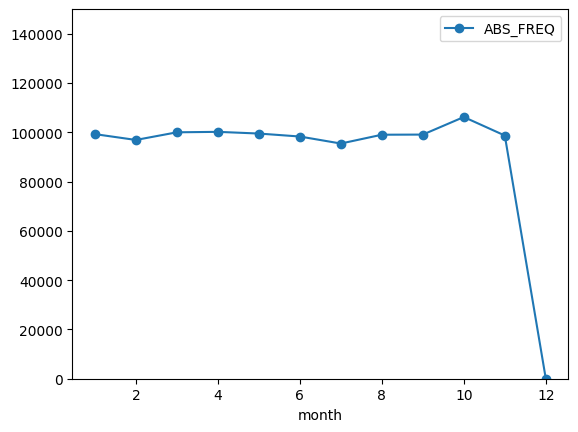

In [58]:
ax = db_count_unique_vals('DATA_REGISTRO', func= 'month').sort_values(by = 'month').plot(x = 'month', y = 'ABS_FREQ', marker = 'o')
ax.set_ylim(0, 150000)

O número total de registros de B.O. é aproximadamente constante durante os meses presentes nos dados, exceto dezembro, pois ainda não incluíram a totalidade de B.O.s. Vamos olhar as contagens discriminadas por natureza do fato relatado.

In [59]:
nat_topcinco = db_count_unique_vals('NATUREZA_APURADA')['NATUREZA_APURADA'].head().to_list()

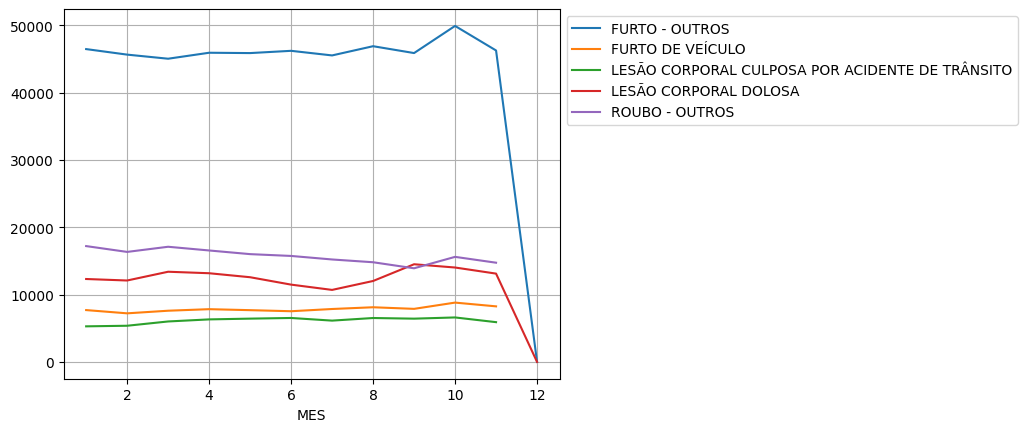

In [60]:
mesregistro_nat = con.sql(f'''
    select month(DATA_REGISTRO) as MES, count(month(DATA_REGISTRO)) as COUNT, NATUREZA_APURADA
    from dados_criminais
    where NATUREZA_APURADA in {nat_topcinco}
    group by all;
    '''
).df()
ax = mesregistro_nat.pivot(index = 'MES', columns =  'NATUREZA_APURADA', values = 'COUNT').plot(grid = True)
ax.legend(bbox_to_anchor=(1, 1))

Vemos que todas as séries são aproximadamente constantes, com exceção de roubos, que apresenta uma tendência geral de queda até o mês 9 e lesão corporal apresenta crescimento a partir do mês de julho até setembro.

<h3>Col: DATA_OCORRENCIA_BO</h3>

In [61]:
db_count_unique_vals('DATA_OCORRENCIA_BO', func= 'year')

,year,ABS_FREQ,REL_FREQ
0,2024,1067174,97.669047
1,2023,21201,1.940341
2,2022,1488,0.136184
3,2021,681,0.062326
4,2014,557,0.050977
5,2020,342,0.031300
6,2019,233,0.021324
7,2018,183,0.016748
8,2017,135,0.012355
9,2016,97,0.008878


<Axes: xlabel='year'>

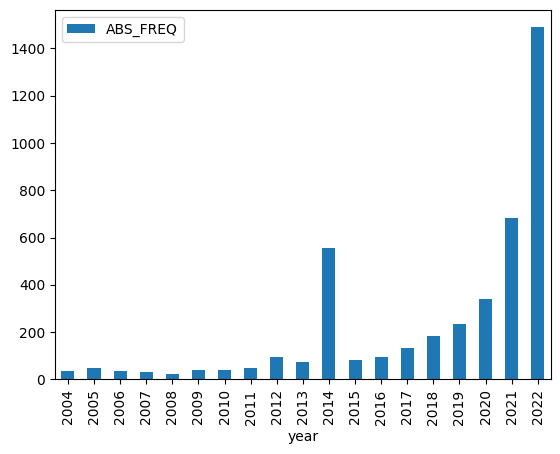

In [62]:
db_count_unique_vals('DATA_OCORRENCIA_BO', func= 'year').query('year < 2023').sort_values('year').plot(kind = 'bar', x = 'year', y = 'ABS_FREQ')

Excluindo 2024 e 2023, temos fatos reportados desde 2004. Dependendo do crime, é possível que já tenha sido prescrito (<a href= 'https://www.tjdft.jus.br/consultas/jurisprudencia/jurisprudencia-em-temas/a-doutrina-na-pratica/extincao-da-punibilidade/prescricao-penal'>ref</a>). Vamos avaliar.

In [63]:
res_query = con.sql(f'''
    select 
        year(DATA_OCORRENCIA_BO) as year, 
        NATUREZA_APURADA, 
        count(NATUREZA_APURADA) as QUANTIDADE
    from dados_criminais
    group by year(DATA_OCORRENCIA_BO), NATUREZA_APURADA;
    '''
).df().sort_values('year').set_index(['year', 'NATUREZA_APURADA'])
res_query.xs(2004)

,QUANTIDADE
NATUREZA_APURADA,
LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,1
ESTUPRO,5
LESÃO CORPORAL DOLOSA,2
ESTUPRO DE VULNERÁVEL,26
FURTO DE VEÍCULO,1


Por exemplo, ao filtrarmos os fatos ocorridos no ano 2004, vemos que houve lesão corporal culposa dentre as naturezas que foram relatados. Nesse caso, a pena máxima é de um ano então a prescrição punitiva é de 4 anos. Podemos olhar as naturezas mais frequentes até 2014.

In [64]:
con.sql(f'''
    select * 
    from 
    (
        select 
            ANO, 
            NATUREZA_APURADA, 
            COUNT,
            row_number() over (
                partition by ANO
                order by COUNT desc
        ) as row
        from  (
            select year(DATA_OCORRENCIA_BO) as ANO, NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT
            from dados_criminais
            group by all
            order by ANO, COUNT desc
        )
    )
    where row < 5
    order by ANO
    '''
).df().head(10)

,ANO,NATUREZA_APURADA,COUNT,row
0,2004,ESTUPRO DE VULNERÁVEL,26,1
1,2004,ESTUPRO,5,2
2,2004,LESÃO CORPORAL DOLOSA,2,3
3,2004,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,1,4
4,2005,ESTUPRO DE VULNERÁVEL,18,1
5,2005,FURTO - OUTROS,16,2
6,2005,ROUBO - OUTROS,4,3
7,2005,LESÃO CORPORAL DOLOSA,3,4
8,2006,ESTUPRO DE VULNERÁVEL,18,1
9,2006,ROUBO - OUTROS,6,2


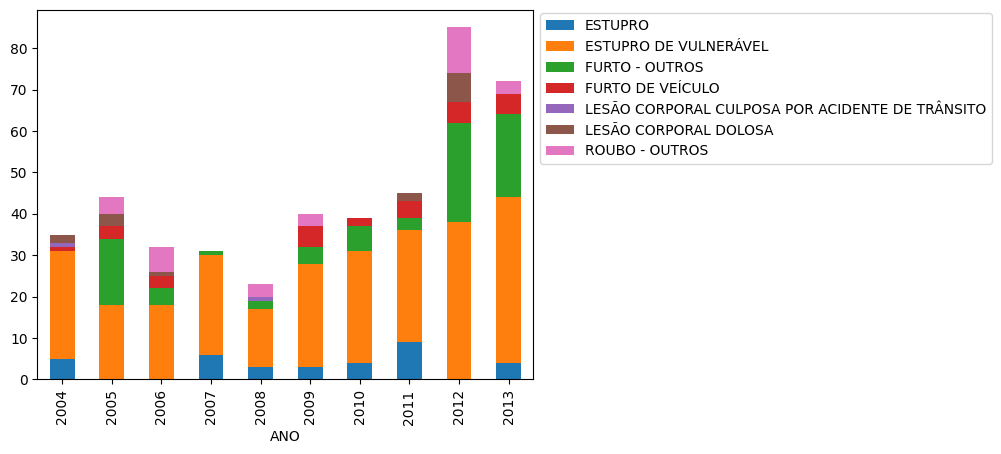

In [65]:
ax = con.sql(f'''
    with ocorr_porano as (
        select *
        from (
            select ANO, COUNT, NATUREZA_APURADA, COUNT, row_number() over (
                partition by ANO
                order by COUNT desc
            ) as n
            from (
                select year(DATA_OCORRENCIA_BO) as ANO, NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT
                from dados_criminais
                group by all
                order by ANO, COUNT desc
            )
        ) as lim_table
        where n <= 5
    )
    pivot ocorr_porano
    on NATUREZA_APURADA
    using sum(COUNT)
    group by ANO;
    '''
).df().set_index('ANO').iloc[:10, :].plot(kind = 'bar', stacked = True)
ax.legend(bbox_to_anchor=(1, 1.01))

Estupro de vulnerável é não somente a única natureza que aparece em todos os anos como é a mais reportada em cada ano, na janela de tempo mostrada no gráfico acima.

<h3>Col: HORA_OCORRENCIA_BO</h3>

In [66]:
db_count_unique_vals('HORA_OCORRENCIA_BO', func = 'hour')

,hour,ABS_FREQ,REL_FREQ
0,19.0,46547,6.041025
1,20.0,46470,6.031031
2,18.0,41391,5.371862
3,21.0,40766,5.290747
4,22.0,37790,4.904512
5,17.0,37276,4.837803
6,12.0,36850,4.782516
7,15.0,36378,4.721258
8,10.0,36251,4.704775
9,16.0,35945,4.665062


Essa coluna é melhor descrita pela coluna DESC_PERIODO.

<h3>Col: DESC_PERIODO</h3>

In [67]:
db_count_unique_vals('DESC_PERIODO')

,DESC_PERIODO,ABS_FREQ,REL_FREQ
0,NULL,770516,70.518550
1,A tarde,78713,7.203908
2,A noite,74310,6.800940
3,Pela manhã,71522,6.545779
4,De madrugada,61432,5.622330
5,Em hora incerta,36139,3.307485
6,EM HORA INCERTA,6,0.000549
7,A NOITE,2,0.000183
8,DE MADRUGADA,2,0.000183
9,A TARDE,1,0.000092


Temos descrições em letras maíusculas e outras não. Vamos uniformizar deixando todas em maiúsculo.

In [68]:
con.sql(f'''
    update dados_criminais
    set DESC_PERIODO = upper(DESC_PERIODO);
    '''
)

In [69]:
db_count_unique_vals('DESC_PERIODO')

,DESC_PERIODO,ABS_FREQ,REL_FREQ
0,NULL,770516,70.518550
1,A TARDE,78714,7.204000
2,A NOITE,74312,6.801124
3,PELA MANHÃ,71522,6.545779
4,DE MADRUGADA,61434,5.622513
5,EM HORA INCERTA,36145,3.308034


Temos muitas string NULL. Será que todos os NULL são também horários null?

In [70]:
con.sql(f'''
    select HORA_OCORRENCIA_BO, DESC_PERIODO
    from dados_criminais
    where DESC_PERIODO = 'NULL'
    '''
).df().head()

,HORA_OCORRENCIA_BO,DESC_PERIODO
0,19:30:00,NULL
1,23:00:00,NULL
2,23:00:00,NULL
3,00:20:00,NULL
4,01:00:00,NULL


Como a resposta é não, vamos utilizar as horas para preencher a DESC_PERIODO seguindo esse <a href= "https://www12.senado.leg.br/manualdecomunicacao/estilos/hora">manual</a>

In [71]:
con.sql(f'''
    update dados_criminais
    set DESC_PERIODO = (
        case
            when hour(HORA_OCORRENCIA_BO) < 6
                then 'DE MADRUGADA'
            when hour(HORA_OCORRENCIA_BO) < 12
                then 'PELA MANHÃ'
            when hour(HORA_OCORRENCIA_BO) < 18
                then 'A TARDE'
            else
                'A NOITE'
        end
    )
    where DESC_PERIODO = 'NULL';
    '''
)

In [72]:
db_count_unique_vals('DESC_PERIODO')

,DESC_PERIODO,ABS_FREQ,REL_FREQ
0,A NOITE,320646,29.345907
1,A TARDE,292820,26.799238
2,PELA MANHÃ,254056,23.251510
3,DE MADRUGADA,188976,17.295311
4,EM HORA INCERTA,36145,3.308034


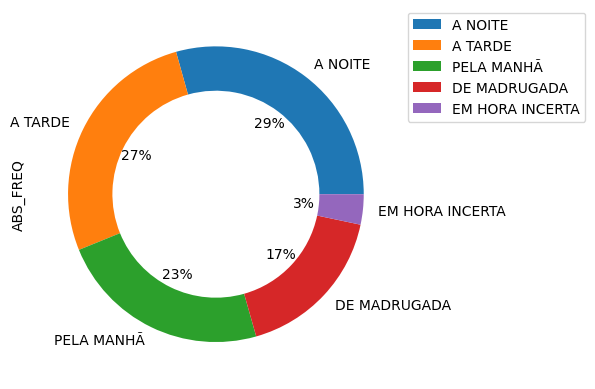

In [73]:
col_df = db_count_unique_vals('DESC_PERIODO')[['DESC_PERIODO', 'ABS_FREQ']]
ax = col_df.plot(kind = 'pie', y = 'ABS_FREQ', labels = col_df['DESC_PERIODO'],  autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax.legend(bbox_to_anchor=(1, 1.01))

A maioria dos fatos ocorreram a noite. Discriminamos os períodos pelas cinco maiores naturezas por período.

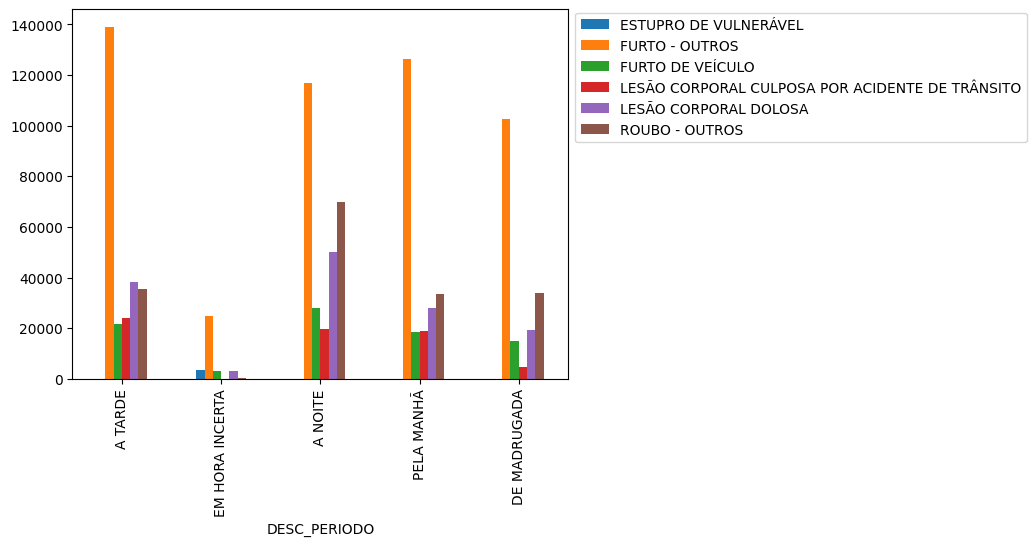

In [74]:
ax = con.sql(f'''
    with periodo_nat as (
        select *
        from (
            select DESC_PERIODO, COUNT, NATUREZA_APURADA, row_number() over (
                partition by DESC_PERIODO
                order by COUNT desc
            ) as n
            from (
                select DESC_PERIODO, NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT
                from dados_criminais
                group by all
                order by DESC_PERIODO, COUNT desc
            )
        ) as lim_table
        where n <= 5
    )
    pivot periodo_nat
    on NATUREZA_APURADA
    using sum(COUNT)
    group by DESC_PERIODO;
    '''
).df().set_index('DESC_PERIODO').plot(kind = 'bar')
ax.legend(bbox_to_anchor=(1, 1.01))

Furto é o que mais ocorreu em todos os períodos. Se omitirmos furto, temos que roubo ocorreu mais a noite, de manhã e de madrugada enquanto a tarde o que mais ocorreu foi lesão corporal dolosa.

<h3>Col: DESCR_SUBTIPOLOCAL</h3>

In [75]:
col_df = db_count_unique_vals('DESCR_SUBTIPOLOCAL')
col_df

,DESCR_SUBTIPOLOCAL,ABS_FREQ,REL_FREQ
0,Via Pública,720395,65.931416
1,Casa,120361,11.015583
2,Outros,36577,3.347571
3,Metroviário e Ferroviário Metropolitano,30025,2.747924
4,NULL,11741,1.074550
...,...,...,...
316,Palácio dos Bandeirantes,1,0.000092
317,Shopping Center,1,0.000092
318,POSTO DE GASOLINA,1,0.000092
319,PAPELARIA/LIVRARIA,1,0.000092


Temos palavras em caixa alta e também em caixa alta-baixa. Por conta disso, vamos uniformizar todas em caixa alta.

In [76]:
con.sql(f'''
    update dados_criminais
    set DESCR_SUBTIPOLOCAL = upper(DESCR_SUBTIPOLOCAL)
    '''
)

In [77]:
col_df = db_count_unique_vals('DESCR_SUBTIPOLOCAL')
col_df

,DESCR_SUBTIPOLOCAL,ABS_FREQ,REL_FREQ
0,VIA PÚBLICA,720395,65.931416
1,CASA,120395,11.018695
2,OUTROS,36577,3.347571
3,METROVIÁRIO E FERROVIÁRIO METROPOLITANO,30025,2.747924
4,NULL,11741,1.074550
...,...,...,...
300,HELIPORTO,1,0.000092
301,PALÁCIO DOS BANDEIRANTES,1,0.000092
302,ENTIDADE ASSISTENCIAL,1,0.000092
303,TEMPLO E AFINS,1,0.000092


In [78]:
col_df.head(10)

,DESCR_SUBTIPOLOCAL,ABS_FREQ,REL_FREQ
0,VIA PÚBLICA,720395,65.931416
1,CASA,120395,11.018695
2,OUTROS,36577,3.347571
3,METROVIÁRIO E FERROVIÁRIO METROPOLITANO,30025,2.747924
4,NULL,11741,1.074550
5,CASAS,8073,0.738851
6,MERCADO,7071,0.647146
7,VEÍCULO EM MOVIMENTO,5935,0.543178
8,TRANSEUNTE,5528,0.505929
9,LOJAS,5408,0.494947


Vamos procurar por erros.

In [79]:
res_col = compare_str(col_df['DESCR_SUBTIPOLOCAL'], dataframe = True)
res_col.head(25)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,APARTAMENTO,APARTAMENTOS,"(11, 16)",0.956522
1,ESCRITÓRIOS,ESCRITÓRIO,"(63, 292)",0.952381
2,BOUTIQUE,BOUTIQUES,"(145, 229)",0.941176
3,CHÁCARA,CHÁCARAS,"(28, 64)",0.933333
4,VIDRAÇARIA,VIDRARIA,"(198, 272)",0.888889
5,CASA,CASAS,"(1, 5)",0.888889
6,DISTRIBUIDORA DE ÁGUA,DISTRIBUIDORA DE GÁS,"(169, 170)",0.878049
7,ESTAÇÃO DE TRATAMENTO DE ESGOTO,ESTAÇÃO DE TRATAMENTO DE ÁGUA,"(132, 142)",0.866667
8,ASSISTÊNCIA TÉCNICA,ASSISTÊNCIA TÉCNICA/OFICINA,"(135, 226)",0.826087
9,AEROPORTUÁRIO,PORTUÁRIO,"(56, 109)",0.818182


Apesar de termos descrições do local em plural e singular, que pode indicar erro no preenchimento, as descrições ainda sim são válidas. Vamos corrigir somente os índices 8, 11, 19

In [80]:
for i in np.r_[8, 11, 19]:
    db_replace('DESCR_SUBTIPOLOCAL', res_col.loc[i, 'string2'], res_col.loc[i, 'string1'])

Obtemos, agora, a natureza por local e como há muitos locais, vamos somente usar os 10 lugares com maior ocorrências.

In [81]:
col_df = db_count_unique_vals('DESCR_SUBTIPOLOCAL')

In [82]:
toplocal = col_df['DESCR_SUBTIPOLOCAL'].head(10).to_list()
toplocal = [i for i in toplocal if i not in ('NULL', 'OUTROS')]

Dentre os 10 locais com maior frequência nos registros, há NULL e OUTROS. Acima eu filtrei NULL e OUTROS e deixei somente 8 locais.

In [83]:
con.sql(f'''
    select * exclude rows
    from (
        select DESCR_SUBTIPOLOCAL, COUNT, NATUREZA_APURADA, row_number() over (
            partition by DESCR_SUBTIPOLOCAL
            order by COUNT desc
        ) as rows
        from (
            select DESCR_SUBTIPOLOCAL, NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT
            from dados_criminais
            where DESCR_SUBTIPOLOCAL in {toplocal}
            group by all
            order by DESCR_SUBTIPOLOCAL, COUNT desc
        )
    ) as lim_table
    where rows <= 2;
    '''
).df().set_index(['DESCR_SUBTIPOLOCAL']).loc[toplocal].set_index('NATUREZA_APURADA', append = True)

COUNT
DESCR_SUBTIPOLOCAL                      NATUREZA_APURADA                                       
VIA PÚBLICA                             FURTO - OUTROS                                   313483
                                        ROUBO - OUTROS                                   151189
CASA                                    LESÃO CORPORAL DOLOSA                             54456
                                        FURTO - OUTROS                                    41408
METROVIÁRIO E FERROVIÁRIO METROPOLITANO FURTO - OUTROS                                    25203
                                        ROUBO - OUTROS                                     3947
CASAS                                   LESÃO CORPORAL DOLOSA                              3662
                                        FURTO - OUTROS                                     2802
MERCADO                                 FURTO - OUTROS                                     5144
                                        LESÃO CORPORAL DOLOSA                               817
VEÍCULO EM MOVIMENTO                    LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO    3009
                                        ROUBO DE VEÍCULO                                   1359
TRANSEUNTE                              ROUBO - OUTROS                                     1944
                                        FURTO - OUTROS                                     1254
LOJAS                                   FURTO - OUTROS                                     4384
                                        LESÃO CORPORAL DOLOSA                               506

Olhando os oito locais onde ocorreram o maior número de ocorrências relatadas, furto é a ocorrência que predomina em todos com exceção de casa, onde os registros mostram que lesão corporam dolosa foi a mais citada, e veículo em movimento, onde a mais documentada foi lesão corporal culposa por acidente de trânsito.

<h3>Col: BAIRRO</h3>

In [84]:
col = db_count_unique_vals('BAIRRO')
col

,BAIRRO,ABS_FREQ,REL_FREQ
0,CENTRO,80989,7.412211
1,NULL,16035,1.467542
2,RURAL,15226,1.393502
3,PINHEIROS,10352,0.947427
4,BELA VISTA,9850,0.901484
...,...,...,...
37731,SOROCAMIRIM/PAVÃO,1,0.000092
37732,CHÁCARA HALTER,1,0.000092
37733,"KM 116,5",1,0.000092
37734,APAREDICINHA,1,0.000092


Uniformizamos

In [85]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = upper(BAIRRO);
    '''
)

In [86]:
db_count_unique_vals('BAIRRO')

,BAIRRO,ABS_FREQ,REL_FREQ
0,CENTRO,81187,7.430332
1,NULL,16035,1.467542
2,RURAL,15285,1.398902
3,PINHEIROS,10359,0.948068
4,BELA VISTA,9863,0.902674
...,...,...,...
35730,JD ITAPARK,1,0.000092
35731,JARDIM ITAQUERA,1,0.000092
35732,TAMANDUATEÍ 2,1,0.000092
35733,NOVO HOMERO THON,1,0.000092


Como temos mais de 32 mil bairros, muito provavelmente temos erros. Vamos buscar por erros utilizando outra estratégia: distribuição das primeiras letras de cada bairro.

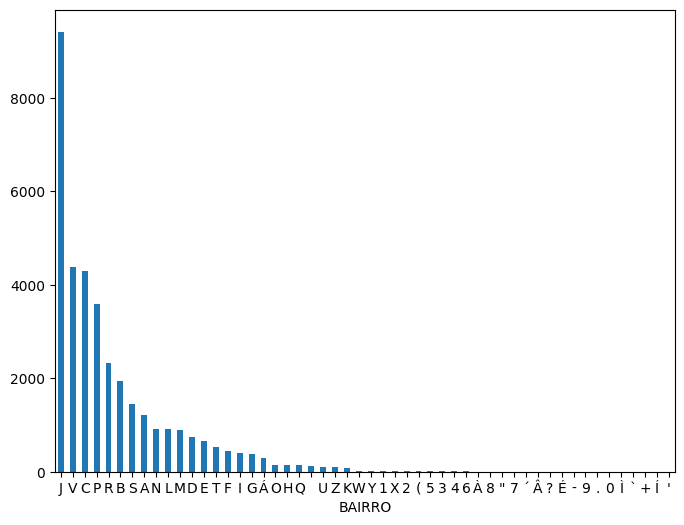

In [87]:
ax = db_count_unique_vals('BAIRRO')['BAIRRO'].str[0].value_counts().plot(kind = 'bar', rot=0, figsize = (8,6))

Temos acentos, números entre outros. Filtramos 

In [88]:
col_prob = con.sql(f'''
    select distinct BAIRRO 
    from dados_criminais
    where BAIRRO not similar to '^[ÁÂÉÍÌA-Z].*';
    '''
).df()
col_prob

,BAIRRO
0,10º DISTRITO INDUSTRIAL
1,JARDIM PAINEIRAS 1
2,FAZENDA PAU D'ALHO
3,2ª ZONA INDUSTRIAL
4,3 MARIAS
...,...
219,PEDRO CAVALINI
220,(L-13)
221,NÚCLEO HABITACIONAL FORTUNATO ROCHA LIMA
222,VILA SAO FERNANDO


In [89]:
col_prob.values.reshape(-1)

array(['10º DISTRITO INDUSTRIAL', ' JARDIM PAINEIRAS 1',
       " FAZENDA PAU D'ALHO", '2ª ZONA INDUSTRIAL', '3 MARIAS', '244',
       '50 COLÔNIA', '-', '????????????', ' VICENTE NUNES', '3 BARRAS',
       '13660000', ' TORTORELLI', ' BAIRRO DOS MACACOS',
       ' COLINA SANTA MÔNICA', '1079', '1', '5ª ESCOLA',
       '2Â° DISTRITO INDUSTRIAL DOMINGOS FERRARI',
       '8º DISTRITO INDUSTRIAL', ' SÃO BENEDITO', ' C CARVALHO',
       '´ROX. IGREJA CONGRESSÃO CRISTÃ', ' ESTANCIA PEROLA NEGRA',
       ' CASCAVEL', ' JARDIM CASA GRANDE', ' BAIRRO FRADES PERIS 8',
       ' PARQUE HIPÓLYTO', ' JARDIM MEDEIROS', ' RURAL', 'ÀREA RURAL',
       '188', '4º DISTRITO INDUSTRIAL', ' COLÉGIO VELHO.',
       ' JARDIM DOS IÊS', '3095', '(N-17)', ' JARDIM SÃO JOÃO', '...',
       '5A', '23 DE MAIO', '58FC 3MRS+RF', '3 PONTES', '?',
       '2° DISTRITO INDUSTRIAL (DOMINGOS FERRARI)', ' VALE DO PARAÍSO',
       '176', ' PQ DOS TRABALHADORES', ' CONJUNTO HABITACIONAL',
       ' VILA INDUSTRIAL', '10º DIST

Corrigimos os espaços e simbolos à direita e/ou à esquerda 

In [90]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = trim(BAIRRO, '`´ -"');
    '''
)

In [91]:
col_prob = con.sql(f'''
    select distinct BAIRRO 
    from dados_criminais
    where BAIRRO not similar to '^[ÁÉÍÓÚA-Z].*';
    '''
).fetchnumpy()['BAIRRO']
col_prob

array(['2ª ZONA INDUSTRIAL', '3 MARIAS', '5A', '23 DE MAIO', 'ÀREA RURAL',
       '????????????', '1', '3095', '(N-17)', '...',
       '10º DISTRITO INDUSTRIAL', '244', '50 COLÔNIA', '3 BARRAS',
       '13660000', '1079', '5ª ESCOLA',
       '2Â° DISTRITO INDUSTRIAL DOMINGOS FERRARI',
       '8º DISTRITO INDUSTRIAL', '600',
       '2° DISTRITO INDUSTRIAL (DOMINGOS FERRARI)', '500', '58FC 3MRS+RF',
       '3 PONTES', '?', '176',
       '10º DISTRITO INDUSTRIAL JOSÉ CUTRALE JUNIOR', '188',
       '4º DISTRITO INDUSTRIAL', 'ÌNDAIA', '.', '(O-16)', '(O-14)',
       '54WP+6G, PEDREIRA - SP, 13920-000', '270', '72',
       '4 ENCRUZILHADAS', '(L-10)', '12 DE SETEMBRO II', '1ª SEÇÃO',
       '(N-19)', '5º DISTRITO INDUSTRIAL', 'ÂNGELO PARMENONDI', '68',
       '401', '24 DE OUTUBRO', '400 CASAS', '(L-11)',
       '1A ZONA INDUSTRIAL', '90', '18 DO FORTE', 'ÂNGELO DE ROSA',
       '??????????', '14850000', '117', '1ª ZONA INDUSTRIAL DE JAÚ',
       'À BEIRA DA REFERIDA RODOVIA', '3M', '21.2330

Alguns bairros possuem somente sinais de pontuação e outros so possuem números. Esses casos vamos renomear para NULL, para indicar que o dado não está presente.

In [92]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = 'NULL'
    where BAIRRO in (
        (
            select distinct BAIRRO 
            from dados_criminais
            where BAIRRO similar to '^[\+\.?].*'
        )
        union
        (
            select distinct BAIRRO 
            from dados_criminais
            where BAIRRO similar to '[0-9]+'
        )
        union
        (
            select distinct BAIRRO 
            from dados_criminais
            where BAIRRO similar to '\s*'
        )
    );
    '''
)

Temos 'À BEIRA DA REFERIDA RODOVIA' como bairro

In [93]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = 'NULL'
    where BAIRRO = 'À BEIRA DA REFERIDA RODOVIA' 
    '''
)

Temos ainda sinais gráficos dentro da string.

In [94]:
con.sql(f'''
    select distinct BAIRRO 
    from dados_criminais
    where BAIRRO similar to '^.*\+.*'
    '''
)

┌───────────────────────────────────┐
│              BAIRRO               │
│              varchar              │
├───────────────────────────────────┤
│ 54WP+6G, PEDREIRA - SP, 13920-000 │
│ KM 151+000                        │
│ KM 54+500M                        │
│ KM 26 +100                        │
│ KM 358+000 LESTE                  │
│ VATRAPUÃ+.                        │
│ 58FC 3MRS+RF                      │
│ KM 425+500 SENT LESTE             │
│ J42V+R75 ITAPIRA, SP              │
│ WQ5X+FC (CODIGO PLUS)             │
│ VILA SÃO JOÃO, KM 20 + 100METROS  │
│ KM 208+400, 208                   │
│ C+ENTRO                           │
│ SP 304 - KM 351 + 400 MTS         │
├───────────────────────────────────┤
│              14 rows              │
└───────────────────────────────────┘

Agora temos mais correções a fazer. Substituímos C+ENTRO por CENTRO e VATRAPUÃ

In [95]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = 'CENTRO'
    where BAIRRO = 'C+ENTRO'
    '''
)

In [96]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = trim(BAIRRO, '+.');
    '''
)

Perceba que alguns bairros possuem km no nome o que pode indicar somente a localidade e não o nome do bairro em si, afinal nem toda localidade da ocorrência será em um bairro. Pesquisando, é possível encontrar que alguns bairros de fato possuem nomes com a palavra km, como por exemplo: o bairro KM 18, em Osasco e KM 4 em Ribeirão Pires.

In [97]:
bairros_prob = con.sql(f'''
    select distinct BAIRRO 
    from dados_criminais
    where BAIRRO similar to '.*KM.*'
    '''
)
bairros_prob

┌───────────────────────────────────┐
│              BAIRRO               │
│              varchar              │
├───────────────────────────────────┤
│ KM.04 - ECO VALLE                 │
│ KM                                │
│ ESTRADA ÁGUA QUENTE KM 02         │
│ KM 148                            │
│ KM 28                             │
│ ESTRADA VICINAL GUAPIAÇU, KM 08   │
│ FUNIL - KM 10,5                   │
│ KM 54+500M                        │
│ KM 15                             │
│ KM 151+000                        │
│     ·                             │
│     ·                             │
│     ·                             │
│ ROD. ELIESER M. MAGALHÃES - KM 58 │
│ KM 45                             │
│ VIA ANHANGUERA KM 402             │
│ SENTIDO PARAGUAÇU PARA 270 KM     │
│ RODOVIA ANHANGUERA, KM 373        │
│ KM 306                            │
│ KM 26                             │
│ KM 322                            │
│ ROD. VICINAL IZIDORO SARAM KM 06  │
│ MIRACATU K

Temos KM 18 e KM dezoito. 

In [98]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = 'KM 18'
    where BAIRRO = 'KM DEZOITO'
    '''
)

Temos outro bairros que mencionam KM e/ou que usa como localização a kilometragem de uma rodovia. Vamos voltar aos casos que contém +

In [99]:
col_prob = con.sql(f'''
    select distinct BAIRRO 
    from dados_criminais
    where BAIRRO similar to '^.*\w[\+]\w.*'
    '''
)
col_prob

┌───────────────────────────────────┐
│              BAIRRO               │
│              varchar              │
├───────────────────────────────────┤
│ KM 208+400, 208                   │
│ 58FC 3MRS+RF                      │
│ KM 425+500 SENT LESTE             │
│ J42V+R75 ITAPIRA, SP              │
│ KM 358+000 LESTE                  │
│ WQ5X+FC (CODIGO PLUS)             │
│ 54WP+6G, PEDREIRA - SP, 13920-000 │
│ KM 151+000                        │
│ KM 54+500M                        │
└───────────────────────────────────┘

Para os bairros contendo KM mantêmmos, para outros bairros trocamos por 'NULL'

In [100]:
for bairro in col_prob.fetchnumpy()['BAIRRO']:
    if 'KM' in bairro:
        db_replace('BAIRRO', bairro, bairro.split('+')[0])
    else:
        db_replace('BAIRRO', bairro, 'NULL')  

Há mais outros erros a serem corrigidos, mas devido a quão diversos são esses erros, as correções se tornam mais difícies.

<h3>Col: Logradouro</h2>

In [101]:
db_count_unique_vals('LOGRADOURO')

,LOGRADOURO,ABS_FREQ,REL_FREQ
0,VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,175574,16.068743
1,AVENIDA PAULISTA,3766,0.344669
2,AVENIDA CRUZEIRO DO SUL,3261,0.298451
3,PRAÇA DA LUZ,2424,0.221847
4,AVENIDA MÁRIO DE ANDRADE,2404,0.220017
...,...,...,...
145057,RUA BENEDITO ROSA SILVA,1,0.000092
145058,RUA ARI RODRIGUES MARTINS,1,0.000092
145059,Rua Bela Vista,1,0.000092
145060,RUA JOSÉ MARIA ASSUMPÇÃO,1,0.000092


Temos um grande número de logradouros e esse número torna a correção de erros muito mais difícil, pois assim como os bairros, o logradouro é inserido pelo usuário o que acaba gerando erros dos mais diversos tipos. Por outro lado, nos dados temos as coordenadas, que se tiverem sido preenchidas corretamente, dão a localização do fato.

Temos um número considerável de dados com vedação da divulgação do logradouro. A Avenida Paulista é o logradouro com maior número de ocorrências, seguida pela Avenida Cruzeiro do Sul, Avenida Mario de Andrade e Praça da Luz. Como pode haver um logradouro com o mesmo nome em municípios ou até mesmo bairros diferentes, vamos olhar por bairro.

In [102]:
con.sql(f'''
    select LOGRADOURO, count(LOGRADOURO) as COUNT, BAIRRO
    from dados_criminais
    where LOGRADOURO <> 'VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS'
    group by all
    order by COUNT desc
    limit 10;
    '''
).df()

,LOGRADOURO,COUNT,BAIRRO
0,AVENIDA MÁRIO DE ANDRADE,2404,BARRA FUNDA
1,PRAÇA DA LUZ,2401,BOM RETIRO
2,AVENIDA PAULISTA,1917,BELA VISTA
3,AVENIDA CRUZEIRO DO SUL,1762,SANTANA
4,RUA DOMINGOS DE MORAIS,1189,VILA MARIANA
5,RUA DA CONSOLAÇÃO,1073,CONSOLAÇÃO
6,AVENIDA SENADOR TEOTONIO VILELA,1062,CIDADE DUTRA
7,RUA AUGUSTA,942,CONSOLACAO
8,AVENIDA CRUZEIRO DO SUL,896,CANINDÉ
9,AVENIDA FRANCISCO MATARAZZO,895,BARRA FUNDA


Por meio dos dados disponíveis, a Avenida Mario de Andrade na Barra Funda - SP é o logradouro com maior número de ocorrências registradas, seguido pela Praça da Luz no Bom Retiro - SP. 

In [103]:
con.sql(f'''
    select LOGRADOURO, count(LOGRADOURO) as COUNT, BAIRRO, NATUREZA_APURADA
    from dados_criminais
    where LOGRADOURO <> 'VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS'
    group by all
    order by COUNT desc
    limit 10;
    '''
).df()

,LOGRADOURO,COUNT,BAIRRO,NATUREZA_APURADA
0,PRAÇA DA LUZ,2116,BOM RETIRO,FURTO - OUTROS
1,AVENIDA MÁRIO DE ANDRADE,2068,BARRA FUNDA,FURTO - OUTROS
2,AVENIDA PAULISTA,1586,BELA VISTA,FURTO - OUTROS
3,AVENIDA CRUZEIRO DO SUL,1201,SANTANA,FURTO - OUTROS
4,RUA DOMINGOS DE MORAIS,909,VILA MARIANA,FURTO - OUTROS
5,AVENIDA SENADOR TEOTONIO VILELA,818,CIDADE DUTRA,FURTO - OUTROS
6,RUA DA CONSOLAÇÃO,793,CONSOLAÇÃO,FURTO - OUTROS
7,AVENIDA FRANCISCO MATARAZZO,770,BARRA FUNDA,FURTO - OUTROS
8,AVENIDA PAULISTA,704,JARDIM PAULISTA,FURTO - OUTROS
9,AVENIDA CRUZEIRO DO SUL,694,CANINDÉ,FURTO - OUTROS


Discriminando pela natureza do ocorrido, vemos que o top dez foi devido a furto. 

In [104]:
con.sql(f'''
    select LOGRADOURO, count(LOGRADOURO) as COUNT, BAIRRO, NATUREZA_APURADA
    from dados_criminais
    where LOGRADOURO <> 'VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS'
    and NATUREZA_APURADA <> 'FURTO - OUTROS'
    group by all
    order by COUNT desc
    limit 10;
    '''
).df()

,LOGRADOURO,COUNT,BAIRRO,NATUREZA_APURADA
0,AVENIDA CRUZEIRO DO SUL,494,SANTANA,ROUBO - OUTROS
1,AVENIDA MÁRIO DE ANDRADE,311,BARRA FUNDA,ROUBO - OUTROS
2,AVENIDA PAULISTA,280,BELA VISTA,ROUBO - OUTROS
3,PRAÇA DA LUZ,254,BOM RETIRO,ROUBO - OUTROS
4,RUA DA CONSOLAÇÃO,236,CONSOLAÇÃO,ROUBO - OUTROS
5,RUA AUGUSTA,236,CONSOLACAO,ROUBO - OUTROS
6,RUA DOMINGOS DE MORAIS,213,VILA MARIANA,ROUBO - OUTROS
7,ESTRADA DO CAMPO LIMPO,212,CAMPO LIMPO,ROUBO - OUTROS
8,RUA MOURATO COELHO,199,PINHEIROS,ROUBO - OUTROS
9,AVENIDA CRUZEIRO DO SUL,191,CANINDÉ,ROUBO - OUTROS


Ao omitirmos furto, a Rua Augusta surge no top 5 com um número alto de roubo e a Avenida cruzeiro do sul fica em primeiro. Todo top 10 é de roubo.

<h3>Col: NUMERO_LOGRADOURO</h3>

In [105]:
db_count_unique_vals('NUMERO_LOGRADOURO')

,NUMERO_LOGRADOURO,ABS_FREQ,REL_FREQ
0,1,50176,5.471356
1,0,44929,4.899206
2,100,18732,2.042599
3,10,10439,1.138303
4,200,7064,0.770282
...,...,...,...
10926,7542,1,0.000109
10927,89120,1,0.000109
10928,6879,1,0.000109
10929,9966,1,0.000109


A maior parte dos valores correspondem ao número 1 o que é intrigante, além disso temos o número zero que, ao que parece, foi usado para representar um local sem número ou que não relatado no Boletim de Ocorrência. Vamos substituir 0 e NULL para null.

In [106]:
con.sql(f'''
    update dados_criminais
    set NUMERO_LOGRADOURO = 'NULL'
    where NUMERO_LOGRADOURO = '0';
    update dados_criminais
    set NUMERO_LOGRADOURO = null
    where NUMERO_LOGRADOURO = 'NULL';
    '''
)

Vamos olhar os maiores números

In [107]:
con.sql(f'''
    select distinct NUMERO_LOGRADOURO, length(NUMERO_LOGRADOURO) as 'TAMANHO', 
    from dados_criminais
    order by TAMANHO desc;
    '''
)

┌───────────────────┬─────────┐
│ NUMERO_LOGRADOURO │ TAMANHO │
│      varchar      │  int64  │
├───────────────────┼─────────┤
│ 10000000000       │      11 │
│ 1111111111        │      10 │
│ 9999999999        │      10 │
│ 1195421612        │      10 │
│ 1196245917        │      10 │
│ 1699417997        │      10 │
│ 1194242681        │      10 │
│ 1195960073        │      10 │
│ 1183898020        │      10 │
│ 2024/01/31        │      10 │
│  ·                │       · │
│  ·                │       · │
│  ·                │       · │
│ 731               │       3 │
│ 610               │       3 │
│ 350               │       3 │
│ 137               │       3 │
│ 139               │       3 │
│ 369               │       3 │
│ 419               │       3 │
│ 270               │       3 │
│ 298               │       3 │
│ 681               │       3 │
├───────────────────┴─────────┤
│ ? rows            2 columns │
└─────────────────────────────┘

Temos números com mais de dez dígitos e uns que se assemelham a números de telefone. Um dos maiores logradouros do Brasil é a <a href =  'https://pt.wikipedia.org/wiki/Avenida_Sapopemba'> Avenida Sapopemba</a> em São Paulo. Na Wikipedia diz que o número vai até 75.008, mas conferindo no Google StreetView, a avenida vai até por volta de 30000 e depois tem um trecho da estrada de Sapopemba que vai até 6000. Então temos no máximo 5 dígitos.

In [108]:
con.sql(f'''
    update dados_criminais
    set NUMERO_LOGRADOURO = null
    where length(NUMERO_LOGRADOURO) > 5;
    '''
)

Passamos para int

In [109]:
con.sql(f'''
    alter table dados_criminais
    alter column NUMERO_LOGRADOURO type int;
    '''
)

Qualquer número aproximadamente acima de 30000 vou substituir por null, com uma certa margem

In [110]:
con.sql(f'''
    update dados_criminais
    set NUMERO_LOGRADOURO = null
    where NUMERO_LOGRADOURO > 31000;
    '''
)

Temos muito provavelmente diversos outros erros nos números preenchidos, mas não achei uma forma eficaz de filtrá-los.

<h3>Col: LATITUDE & LONGITUDE</h3>

Como estamos trabalhando com os dados de São Paulo, esperamos que latitude e longitude sejam aproximadamente (-23, -46)

In [111]:
db_count_unique_vals('LATITUDE', func = 'round')

,round,ABS_FREQ,REL_FREQ
0,-24.0,472836,48.373355
1,-23.0,210546,21.539850
2,0.0,175608,17.965527
3,-21.0,54893,5.615813
4,-22.0,52884,5.410283
5,-20.0,8761,0.896292
6,-25.0,1934,0.197857
7,-32.0,2,0.000205
8,-214649744.0,1,0.000102
9,-13.0,1,0.000102


Primeiramente temos o 0 que corresponde a localização da linha do equador, logo a localização não parece corresponder a localização do ocorrido. Vamos olhar junto com o logradouro.

In [112]:
con.sql(f'''
    select LATITUDE, LONGITUDE, LOGRADOURO, count(LOGRADOURO)
    from dados_criminais
    where LATITUDE = 0 or
    LONGITUDE = 0
    group by all
    '''
).df()

,LATITUDE,LONGITUDE,LOGRADOURO,count(LOGRADOURO)
0,0.0,0.0,RUA THEREZA CARMUSCIANO PAULINI,1
1,0.0,0.0,RUA DAS ROSAS,1
2,0.0,0.0,AVENIDA RIVER,1
3,0.0,0.0,"VIA ANCHIETA, KM 23,5",1
4,0.0,0.0,RUA OXOSSI,1
5,0.0,0.0,AVENIDA PROFESSOR HERMÓGENES DE FREITAS LEITÃO...,1
6,0.0,0.0,RUA DOUTOR LÁZARO SILVA,1
7,0.0,0.0,RUA SALES,1
8,0.0,0.0,RUA FORTE DE TRINDADE,1
9,0.0,0.0,RUA JOSÉ ROBERTO ASSENCO,1


Da tabela acima, vemos que há correspondência entre os 0 da latitude e o 0 da longitude, ou seja, o 0 foi usado para indicar que não foi preenchido e para dados com vedação de divulgação. Portanto, vamos mudar os 0s para null.

In [113]:
con.sql(f'''
    update dados_criminais
    set LATITUDE = null,
    LONGITUDE = null
    where LATITUDE = 0
    '''
)

Temos também valores enormes, o que pode indicar erro no preenchimento desses dados.

In [114]:
con.sql(f'''
    select LATITUDE, LONGITUDE, BAIRRO, NOME_MUNICIPIO_CIRCUNSCRIÇÃO
    from dados_criminais
    where round(LATITUDE) < -100
    '''
).df()

,LATITUDE,LONGITUDE,BAIRRO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO
0,-235097648.0,-466182336.0,CARANDIRU,S.PAULO
1,-214649744.0,-492246528.0,MACHADO,NOVO HORIZONTE
2,-207369104.0,-493169696.0,RURAL,S.JOSE DO RIO PRETO


Utilizando o maps do google, pude verificar que quem preencheu esses dados esqueceu de separa os decimais com o ponto

In [115]:
con.sql(f'''
    update dados_criminais
    set LONGITUDE = LONGITUDE/1e7, 
    LATITUDE = LONGITUDE/1e7
    where round(LATITUDE) < -100
    '''
)

In [116]:
db_count_unique_vals('LONGITUDE', func = 'round')

,round,ABS_FREQ,REL_FREQ
0,-47.0,521737,65.065522
1,-46.0,145546,18.150958
2,-48.0,56011,6.985100
3,-49.0,33340,4.157812
4,-50.0,21682,2.703950
5,-51.0,11158,1.391508
6,-45.0,9562,1.192472
7,-52.0,2630,0.327986
8,-53.0,134,0.016711
9,-44.0,59,0.007358


e latitude.

In [117]:
db_count_unique_vals('LATITUDE', func = 'round')

,round,ABS_FREQ,REL_FREQ
0,-24.0,472836,58.967107
1,-23.0,210546,26.257071
2,-21.0,54893,6.845675
3,-22.0,52884,6.595133
4,-20.0,8761,1.092579
5,-25.0,1934,0.241188
6,-32.0,2,0.000249
7,-49.0,2,0.000249
8,-6.0,1,0.000125
9,-18.0,1,0.000125


Temos alguns latitudes que são maiores que -20.

In [118]:
con.sql(f'''
    select ID, LATITUDE, LONGITUDE, NOME_MUNICIPIO, NOME_DELEGACIA, LOGRADOURO, BAIRRO, NOME_MUNICIPIO_CIRCUNSCRIÇÃO, DATA_REGISTRO, DATA_OCORRENCIA_BO
    from dados_criminais
    where LATITUDE::int > -20
    '''
).df()

,ID,LATITUDE,LONGITUDE,NOME_MUNICIPIO,NOME_DELEGACIA,LOGRADOURO,BAIRRO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,DATA_REGISTRO,DATA_OCORRENCIA_BO
0,677255,-5.529876,-47.471695,GUARULHOS,DELEGACIA DA MULHER ONLINE,RUA ALAGOAS,NOVA PONTE ALTA,GUARULHOS,2024-07-01,2024-07-01
1,751222,-17.541517,-42.754822,MENDONCA,DEL.POL.MENDONCA,RUA SEBASTIÃO VOLPE X RU DR JACINTO DE SOUZA,CENTRO,MENDONCA,2024-08-09,2024-04-13
2,756234,-15.356818,-38.988258,ILHA COMPRIDA,DEL.POL.ILHA COMPRIDA,AVENIDA BEIRA MAR,BALNEÁRIO SINFONIA DO MAR,ILHA COMPRIDA,2024-08-09,2024-08-08
3,889750,-13.400908,-44.214367,S.MARIA DA VITORIA,03º D.P. CAMPOS ELISEOS,RUA SANTA EFIGÊNCIA,NULL,S.PAULO,2024-10-14,2024-09-29


No primeiro caso da tabela acima, as coordenadas apontam para a cidade chamada Imperatriz no Maranhão e embora haja uma Rua Alagoas, muito provavelmente se trata do lugar errado pois o registro foi feito na cidade de Guarulhos e o município de circunscrição também é Guarulhos. Procurando o bairro e o município no google, encontrei que a rua tem as coordenadas (-23.398199, -46.424011). No segundo caso, a coordenada correta é (-21.182924, -49.583108). O último possui a seguinte geolocalização: (-24.842526, -47.684187).

In [119]:
con.sql(f'''
    update dados_criminais
    set LATITUDE = -23.398199,
    LONGITUDE = -46.424011
    where ID = 677255;
    
    update dados_criminais
    set LATITUDE = -21.182924,
    LONGITUDE = -49.583108
    where ID = 751222;
    
    update dados_criminais
    set LATITUDE = -24.842526,
    LONGITUDE = -47.684187
    where ID = 756234;
    '''
)

In [120]:
con.sql(f'''
    select ID, LATITUDE, LONGITUDE, NOME_MUNICIPIO, NOME_DELEGACIA, LOGRADOURO, BAIRRO, NOME_MUNICIPIO_CIRCUNSCRIÇÃO, DATA_REGISTRO, DATA_OCORRENCIA_BO
    from dados_criminais
    where LATITUDE::int < -30
    '''
).df()

,ID,LATITUDE,LONGITUDE,NOME_MUNICIPIO,NOME_DELEGACIA,LOGRADOURO,BAIRRO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,DATA_REGISTRO,DATA_OCORRENCIA_BO
0,515310,-46.618233,-46.618233,S.PAULO,13Âº D.P. CASA VERDE,AVENIDA ZAKI NARCHI,CARANDIRU,S.PAULO,2024-06-24,2024-06-24
1,556515,-49.224651,-49.224651,NOVO HORIZONTE,DEL.POL.NOVO HORIZONTE,ELISIARIO SARDELLA,MACHADO,NOVO HORIZONTE,2024-06-28,2024-06-28
2,557457,-49.316971,-49.316971,S.JOSE DO RIO PRETO,03º D.P. S.JOSE RIO PRETO,ESTRADA VICINAL PARA TALHADO,RURAL,S.JOSE DO RIO PRETO,2024-06-27,2024-06-17
3,571927,-32.006485,-52.038315,S.JOSE DO RIO PARDO,DEL.SEC.CASA BRANCA,JOÃO BATISTA RIBEIRO DE LIMA,REDENTOR I,S.JOSE DO RIO PARDO,2024-06-30,2024-06-30
4,571928,-32.006485,-52.038315,S.JOSE DO RIO PARDO,DEL.SEC.CASA BRANCA,JOÃO BATISTA RIBEIRO DE LIMA,REDENTOR I,S.JOSE DO RIO PARDO,2024-06-30,2024-06-30


In [121]:
con.sql(f'''
    update dados_criminais
    set LATITUDE = -23.509952,
    LONGITUDE = -46.618169
    where ID= 515310;
    
    update dados_criminais
    set LATITUDE = -21.476402,
    LONGITUDE = -49.206884
    where ID= 556515;
    
    update dados_criminais
    set LATITUDE = -20.736927,
    LONGITUDE = -49.316984
    where ID= 557457;

    update dados_criminais
    set LATITUDE = -21.585403,
    LONGITUDE = -46.905198
    where ID= 571927;

    update dados_criminais
    set LATITUDE = -21.585403,
    LONGITUDE = -46.905198
    where ID= 571928;
    '''
)

Como temos latitude e longitude, vamos criar uma coluna de pontos geoespaciais.

In [122]:
con.sql(f'''
    alter table dados_criminais
    add column geom geometry;
    update dados_criminais
    set geom = st_point(LONGITUDE, LATITUDE);
    '''
)

Nos dados, não temos o município onde ocorreu o fato. Podemos usar um shapefile para intersectar os pontos com a geometria de cada estado. Porém, ao tentar fazer o join usando o duckdb, provavelmente devido ao join não ser otimizado (memória), meu pc trava completamente; por isso vou usar geopandas para fazer essa operação.

In [123]:
dcriminais_df = con.sql(f'''
    select ID, ST_AsText(geom) as geom from dados_criminais
    '''
).df()

In [124]:
dcriminais_gdf = gpd.GeoDataFrame(dcriminais_df, geometry= gpd.GeoSeries.from_wkt(dcriminais_df['geom']))
dcriminais_gdf.head()

,ID,geom,geometry
0,1,None,None
1,2,POINT (-46.63783264160156 -23.551559448242188),POINT (-46.63783 -23.55156)
2,3,POINT (-46.63404846191406 -23.55120086669922),POINT (-46.63405 -23.55120)
3,4,POINT (-46.6257438659668 -23.552387237548828),POINT (-46.62574 -23.55239)
4,5,None,None


In [125]:
spmun_gdf = gpd.read_file(r'shapefiles/SP_Municipios_2022.zip')
spmun_gdf.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


Vamos passar o sistema de referência de coordenadas (CRS) do dataframe de municipios para os dados criminais que não tem, antes de fazer o join espacial.

In [126]:
dcriminais_gdf.crs = spmun_gdf.crs

In [127]:
sjoined_gdf = dcriminais_gdf.sjoin(spmun_gdf, how ='left')
sjoined_gdf.head()

,ID,geom,geometry,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2
0,1,None,None,NaN,NaN,NaN,NaN,NaN
1,2,POINT (-46.63783264160156 -23.551559448242188),POINT (-46.63783 -23.55156),562.0,3550308,São Paulo,SP,1521.202
2,3,POINT (-46.63404846191406 -23.55120086669922),POINT (-46.63405 -23.55120),562.0,3550308,São Paulo,SP,1521.202
3,4,POINT (-46.6257438659668 -23.552387237548828),POINT (-46.62574 -23.55239),562.0,3550308,São Paulo,SP,1521.202
4,5,None,None,NaN,NaN,NaN,NaN,NaN


Será que todos os pontos estão dentro do estado de São Paulo? Filtramos.

In [128]:
sjoined_gdf[(sjoined_gdf['geometry'] != None) & (sjoined_gdf['SIGLA_UF'] != 'SP')]

,ID,geom,geometry,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2
40763,40764,POINT (-45.39740753173828 -23.8093204498291),POINT (-45.39741 -23.80932),NaN,NaN,NaN,NaN,NaN
235571,235572,POINT (-43.34605407714844 -22.882051467895508),POINT (-43.34605 -22.88205),NaN,NaN,NaN,NaN,NaN
236029,236030,POINT (-44.699073791503906 -22.51302719116211),POINT (-44.69907 -22.51303),NaN,NaN,NaN,NaN,NaN
387203,387204,POINT (-43.29473876953125 -22.819355010986328),POINT (-43.29474 -22.81936),NaN,NaN,NaN,NaN,NaN
436682,436683,POINT (-44.73031234741211 -22.44329071044922),POINT (-44.73031 -22.44329),NaN,NaN,NaN,NaN,NaN
439052,439053,POINT (-45.39740753173828 -23.8093204498291),POINT (-45.39741 -23.80932),NaN,NaN,NaN,NaN,NaN
439287,439288,POINT (-44.95576858520508 -23.38041114807129),POINT (-44.95577 -23.38041),NaN,NaN,NaN,NaN,NaN
457677,457678,POINT (-49.9881591796875 -22.912109375),POINT (-49.98816 -22.91211),NaN,NaN,NaN,NaN,NaN
457729,457730,POINT (-53.514244079589844 -24.406688690185547),POINT (-53.51424 -24.40669),NaN,NaN,NaN,NaN,NaN
551318,551319,POINT (-49.9366340637207 -28.291303634643555),POINT (-49.93663 -28.29130),NaN,NaN,NaN,NaN,NaN


Pegamos os índices para depois colocarmos como Null

In [129]:
outsp_ids = sjoined_gdf[(sjoined_gdf['geometry'] != None) & (sjoined_gdf['SIGLA_UF'] != 'SP')].loc[:, 'ID'].to_list()

Isolamos as colunas importantes que são nome do município (NM_MUN) e UF (SIGLA_UF).

In [130]:
mun_gdf = sjoined_gdf[['ID', 'NM_MUN', 'SIGLA_UF']]

Passamos para a base de dados e fazemos o join.

In [131]:
con.sql(f'''
    create or replace table mun_table as (
        select * from mun_gdf
        );
    '''
)

In [132]:
con.sql(f'''
    create or replace table dados_criminais as (
        select * from dados_criminais as DC
        inner join mun_table as MT
            on DC.ID = MT.ID
        )
        order by DC.ID
    '''
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [133]:
con.sql(f'''
    select * from dados_criminais
    limit 2;
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO,geom,ID_1,NM_MUN,SIGLA_UF
0,1,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2024,AA0650,2024-01-01,2024-01-01,DE MADRUGADA,...,Furto (art. 155),Outros,FURTO - OUTROS,1,2024,NaN,NaN,1,None,None
1,2,DECAP,DEL.SEC.6º SANTO AMARO,11º D.P. SANTO AMARO,S.PAULO,2024,AA0877,2024-01-01,2023-12-30,A NOITE,...,Roubo (art. 157),Transeunte,ROUBO - OUTROS,1,2024,19:30:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,São Paulo,SP


Usando os índices das geometrias fora do Estado de São Paulo, passamos os valores para nulo.

In [134]:
con.sql(f'''
    update dados_criminais 
    set geom = null
    where ID in {outsp_ids}
    '''
)

Como todos os registros foram de fatos que aconteceram no estado de São Paulo, vamos preencher o valores nulos presentes na coluna SIGLA_UF

In [135]:
con.sql(f'''
    update dados_criminais
    set SIGLA_UF = 'SP'
    where SIGLA_UF is null;
    '''
)

Mudamos os nomes: de NM_MUN para MUN_OCORR e SIGLA_UF para UF_OCORR.

In [136]:
con.sql(f'''
    alter table dados_criminais
    rename NM_MUN to MUN_OCORR;
    alter table dados_criminais
    rename SIGLA_UF to UF_OCORR;
    '''
)

Deletamos coluna ID, que veio do join.

In [137]:
con.sql(f'''
    alter table dados_criminais
    drop column ID_1;
    '''
)

In [138]:
con.sql(f'''
    select * from dados_criminais
    limit 5
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO,geom,MUN_OCORR,UF_OCORR
0,1,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2024,AA0650,2024-01-01,2024-01-01,DE MADRUGADA,...,S.PAULO,Furto (art. 155),Outros,FURTO - OUTROS,1,2024,NaN,NaN,None,SP
1,2,DECAP,DEL.SEC.6º SANTO AMARO,11º D.P. SANTO AMARO,S.PAULO,2024,AA0877,2024-01-01,2023-12-30,A NOITE,...,S.PAULO,Roubo (art. 157),Transeunte,ROUBO - OUTROS,1,2024,19:30:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",São Paulo,SP
2,3,DECAP,DEL.SEC.4º NORTE,13º D.P. CASA VERDE,S.PAULO,2024,AA1075,2024-01-01,2023-12-31,A NOITE,...,S.PAULO,Furto (art. 155),Transeunte,FURTO - OUTROS,1,2024,23:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",São Paulo,SP
3,4,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 1,S.PAULO,2024,AA1444,2024-01-01,2023-12-31,A NOITE,...,S.PAULO,Furto (art. 155),Interior de Veículo,FURTO - OUTROS,1,2024,23:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",São Paulo,SP
4,5,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 1,S.PAULO,2024,AA1648,2024-01-01,2024-01-01,DE MADRUGADA,...,S.PAULO,Roubo (art. 157),Outros,ROUBO - OUTROS,1,2024,00:20:00,NaN,None,SP


In [139]:
tab_overview('dados_criminais')

,cid,name,type,notnull,dflt_value,pk
0,0,ID,BIGINT,False,None,False
1,1,NOME_DEPARTAMENTO,VARCHAR,False,None,False
2,2,NOME_SECCIONAL,VARCHAR,False,None,False
3,3,NOME_DELEGACIA,VARCHAR,False,None,False
4,4,NOME_MUNICIPIO,VARCHAR,False,None,False
5,5,ANO_BO,INTEGER,False,None,False
6,6,NUM_BO,VARCHAR,False,None,False
7,7,DATA_REGISTRO,DATE,False,None,False
8,8,DATA_OCORRENCIA_BO,DATE,False,None,False
9,9,DESC_PERIODO,VARCHAR,False,None,False


<h3> Col: NOME_DELEGACIA_CIRCUNSCRIÇÃO </h3>

In [140]:
col = db_count_unique_vals('NOME_DELEGACIA_CIRCUNSCRIÇÃO')
col

,NOME_DELEGACIA_CIRCUNSCRIÇÃO,ABS_FREQ,REL_FREQ
0,23º D.P. PERDIZES,14348,1.313146
1,14º D.P. PINHEIROS,12760,1.167811
2,01º D.P. SE,11964,1.094960
3,03º D.P. CAMPOS ELISEOS,10482,0.959325
4,12º D.P. PARI,10043,0.919147
...,...,...,...
1035,DEL.POL.SANTA SALETE,13,0.001190
1036,DEL.POL.RUBIÁCEA,11,0.001007
1037,DEL.POL.TORRE DE PEDRA,10,0.000915
1038,DEL.POL.BORÁ,10,0.000915


A delegacia responsável pela região com maior número de ocorrência é a 23º D. P. PERDIZES.

<h3> Col: NOME_SECCIONAL_CIRCUNSCRIÇÃO </h3>

In [141]:
db_count_unique_vals('NOME_SECCIONAL_CIRCUNSCRIÇÃO')

,NOME_SECCIONAL_CIRCUNSCRIÇÃO,ABS_FREQ,REL_FREQ
0,DEL.SEC.3º OESTE,84158,7.702241
1,DEL.SEC.1º CENTRO,78458,7.180570
2,DEL.SEC.6º SANTO AMARO,60817,5.566045
3,DEL.SEC.4º NORTE,53489,4.895378
4,DEL.SEC.2º SUL,45424,4.157259
...,...,...,...
66,DEL.SEC.FERNANDÓPOLIS,2010,0.183958
67,DEL.SEC.DRACENA,1994,0.182493
68,DEL.SEC.JACUPIRANGA,1735,0.158789
69,DEL.SEC.CRUZEIRO,1731,0.158423


A maior parte dos registros foram em regiões onde atuam as delegacias coordenadas pela seccional 3º Oeste. 

<h3> Col: NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO </h3>

In [142]:
db_count_unique_vals('NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO')

,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,ABS_FREQ,REL_FREQ
0,DECAP,436999,39.994673
1,DEMACRO,199442,18.253171
2,DEINTER 2 - CAMPINAS,75010,6.865005
3,DEINTER 3 - RIBEIRAO PRETO,69838,6.391658
4,DEINTER 9 - PIRACICABA,60664,5.552042
5,DEINTER 6 - SANTOS,58851,5.386114
6,DEINTER 7 - SOROCABA,51260,4.691377
7,DEINTER 1 - SAO JOSE DOS CAMPOS,41996,3.843524
8,DEINTER 4 - BAURU,35043,3.207177
9,DEINTER 5 - SAO JOSE DO RIO PRETO,31161,2.851892


A maior parte dos registros se referem a caso que se deram na região abrangida pelo DECAP, que é a capital.

<h3> Col: NOME_MUNICIPIO_CIRCUNSCRIÇÃO </h3>

In [143]:
db_count_unique_vals('NOME_MUNICIPIO_CIRCUNSCRIÇÃO')

,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,ABS_FREQ,REL_FREQ
0,S.PAULO,436999,39.994673
1,CAMPINAS,31890,2.918611
2,GUARULHOS,30012,2.746734
3,S.ANDRE,22328,2.043485
4,S.BERNARDO DO CAMPO,18074,1.654154
...,...,...,...
640,S.SALETE,13,0.001190
641,RUBIACEA,11,0.001007
642,TORRE DE PEDRA,10,0.000915
643,BORA,10,0.000915


Será que fatos registrados que ocorreram em São Paulo têm como município de circunscrição da delegacia responsável o município de São Paulo?

In [144]:
con.sql(f'''
    select count(NOME_MUNICIPIO_CIRCUNSCRIÇÃO) 
    from dados_criminais
    where replace(NOME_MUNICIPIO_CIRCUNSCRIÇÃO, 'S.', 'SÃO ') = upper(MUN_OCORR)
    and MUN_OCORR = 'São Paulo'
    '''
)

┌───────────────────────────────────────┐
│ count("NOME_MUNICIPIO_CIRCUNSCRIÇÃO") │
│                 int64                 │
├───────────────────────────────────────┤
│                                354784 │
└───────────────────────────────────────┘

In [145]:
con.sql(f'''
    select count(MUN_OCORR)
    from dados_criminais 
    where MUN_OCORR = 'São Paulo'
    '''
)

┌──────────────────┐
│ count(MUN_OCORR) │
│      int64       │
├──────────────────┤
│           355036 │
└──────────────────┘

Como os números são próximos, podemos então dizer que o nome do município de circunscrição corresponde ao município onde ocorreu o evento descrito no B.O.s. Será então que as divergências são devido às coordenadas terem sido mal preenchidas ou a circunscrição de certas delegaciais vão além dos limites geográficos do município? Focamos em São Paulo.

In [146]:
con.sql(f'''
    select NOME_MUNICIPIO, NOME_DELEGACIA, BAIRRO, LOGRADOURO, NOME_MUNICIPIO_CIRCUNSCRIÇÃO, MUN_OCORR
    from dados_criminais
    where replace(NOME_MUNICIPIO_CIRCUNSCRIÇÃO, 'S.', 'SÃO ') <> upper(MUN_OCORR)
    and MUN_OCORR = 'São Paulo'
    '''
).df()

,NOME_MUNICIPIO,NOME_DELEGACIA,BAIRRO,LOGRADOURO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,MUN_OCORR
0,S.PAULO,DEL.POL.MIRANDOPOLIS,MIRANDÓPOLIS,RUA RAFAEL PEREIRA,MIRANDOPOLIS,São Paulo
1,S.ROSA DE VITERBO,DEL.POL.S.ROSA DE VITERBO,NULL,AVENIDA SÃO PAULO,S.ROSA DE VITERBO,São Paulo
2,S.PAULO,DELEGACIA ELETRONICA 1,CONSOLAÇÃO,RUA BELA CINTRA,S.CARLOS,São Paulo
3,S.PAULO,98º D.P. JARDIM MIRIAM,PEDREIRA,RUA GASPAR RICARDO,DIADEMA,São Paulo
4,S.PAULO,DELEGACIA ELETRONICA,CIDADE JÚLIA,RUA BELA CINTRA,DIADEMA,São Paulo
...,...,...,...,...,...,...
247,TABOAO DA SERRA,DELEGACIA ELETRONICA,P MONTE ALEGRE,AVENIDA JOSÉ ANDRÉ DE MORÃES,TABOAO DA SERRA,São Paulo
248,TABOAO DA SERRA,DELEGACIA ELETRONICA,P MONTE ALEGRE,AVENIDA JOSÉ ANDRÉ DE MORÃES,TABOAO DA SERRA,São Paulo
249,S.PAULO,DELEGACIA ELETRONICA,RAPOSO TAVARES,RUA CAPIVARI MIRIM,TABOAO DA SERRA,São Paulo
250,TABOAO DA SERRA,DELEGACIA ELETRONICA,P MONTE ALEGRE,AVENIDA JOSÉ ANDRÉ DE MORÃES,TABOAO DA SERRA,São Paulo


Alguns fatos que aconteceram na capital estão na circunscrição de delegacias de outras cidades, outros realmente ocorreram em outras cidades e, ao que parece, estão com as coordenadas erradas.

<h3> Col: RUBRICA </h3>

In [147]:
db_count_unique_vals('RUBRICA')

,RUBRICA,ABS_FREQ,REL_FREQ
0,Furto (art. 155),596194,54.564391
1,Roubo (art. 157),206011,18.854374
2,Lesão corporal (art. 129),142007,12.996651
3,Lesão corporal culposa na direção de veículo a...,67596,6.186467
4,"tráfico drogas (Art.33, caput)",20181,1.846989
...,...,...,...
79,Resistência (art. 329),1,0.000092
80,Fabricação de drogas (Art.34),1,0.000092
81,Homicídio (art.121),1,0.000092
82,Desobediência (art. 330),1,0.000092


Mais da metade de todos os registros foram devido a furto.

<h3> Col: DESCR_CONDUTA </h3>

In [148]:
db_count_unique_vals('DESCR_CONDUTA')

,DESCR_CONDUTA,ABS_FREQ,REL_FREQ
0,Outros,495914,45.386645
1,NULL,287834,26.342913
2,Veículo,112987,10.340706
3,Transeunte,48492,4.438046
4,Residência,37199,3.404497
...,...,...,...
80,"§ 3º,I - Se da violência resulta morte",1,0.000092
81,da omissão resulta a morte,1,0.000092
82,Â§ 1O AUMENTA-SE A PENA DE 1/3 (UM TERCO) A ME...,1,0.000092
83,"§ 2º, VII - se a violência ou grave ameaça é e...",1,0.000092


Desconsiderando Outros e NULL, cada descrição de conduta está mais relacionada a qual crime?

In [149]:
topdescr = [descr for descr in db_count_unique_vals('DESCR_CONDUTA')['DESCR_CONDUTA'].head(10) if descr not in ('Outros', 'NULL')]

In [150]:
con.sql(f'''
    select  * exclude n
    from (
        select DESCR_CONDUTA, COUNT, NATUREZA_APURADA, row_number() over (
            partition by DESCR_CONDUTA
            order by COUNT desc
        ) as n
        from (
            select DESCR_CONDUTA, count(DESCR_CONDUTA) as COUNT, NATUREZA_APURADA
            from dados_criminais
            where DESCR_CONDUTA in {topdescr}
            group by all
            order by all desc
        )
    ) as lim_table
    where n <= 2
    '''
).df().set_index(['DESCR_CONDUTA']).loc[topdescr].set_index('NATUREZA_APURADA', append = True)

COUNT
DESCR_CONDUTA             NATUREZA_APURADA       
Veículo                   FURTO DE VEÍCULO  85537
                          ROUBO DE VEÍCULO  27161
Transeunte                ROUBO - OUTROS    27670
                          FURTO - OUTROS    20534
Residência                FURTO - OUTROS    34880
                          ROUBO - OUTROS     2308
Fios e Cabos              FURTO - OUTROS    35709
                          FURTO DE VEÍCULO      1
Interior de Veículo       FURTO - OUTROS    16839
                          ROUBO - OUTROS     4354
Estabelecimento Comercial FURTO - OUTROS    15845
                          ROUBO - OUTROS     3187
Interior Estabelecimento  FURTO - OUTROS     8007
                          ROUBO - OUTROS      935
Estabelecimento-Outros    FURTO - OUTROS     4608
                          ROUBO - OUTROS      410

Como podemos ver na tabela acima, todos o locais, veículos, objetos, circunstâncias associados ao ocorrido foram devido primariamente ao furto desses.

<h3> Col: NATUREZA_APURADA </h3>

In [151]:
db_count_unique_vals('NATUREZA_APURADA')

,NATUREZA_APURADA,ABS_FREQ,REL_FREQ
0,FURTO - OUTROS,509596,46.638838
1,ROUBO - OUTROS,173227,15.853943
2,LESÃO CORPORAL DOLOSA,139407,12.758696
3,FURTO DE VEÍCULO,86505,7.917042
4,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,67545,6.181800
5,TRÁFICO DE ENTORPECENTES,35105,3.212852
6,ROUBO DE VEÍCULO,28341,2.593802
7,PORTE DE ENTORPECENTES,12143,1.111342
8,ESTUPRO DE VULNERÁVEL,10371,0.949166
9,APREENSÃO DE ENTORPECENTES,5162,0.472432


Sabemos que furto é de longe a natureza mais registradas nos dados de 2024. Vamos verificar então quais municípios de São Paulo não tiveram furto como o maior número de registros e ver qual foi a natureza mais registrada.

In [152]:
con.sql(f'''
    with top_crimes_cidades as (
        select * exclude rows
            from (
                select MUN_OCORR, COUNT, NATUREZA_APURADA, row_number() over (
                    partition by MUN_OCORR
                    order by COUNT desc
                ) as rows
                from (
                    select MUN_OCORR, count(MUN_OCORR) as COUNT, NATUREZA_APURADA
                    from dados_criminais
                    group by all
                    order by MUN_OCORR, COUNT desc
                )
            ) as lim_table
            where rows = 1
        )
    select MUN_OCORR, NATUREZA_APURADA, COUNT
    from top_crimes_cidades
    where NATUREZA_APURADA <> 'FURTO - OUTROS'
    '''
).df().sort_values('COUNT', ascending = False).head(10)

,MUN_OCORR,NATUREZA_APURADA,COUNT
96,Carapicuíba,ROUBO - OUTROS,2147
123,Taboão da Serra,ROUBO - OUTROS,1470
49,Itapecerica da Serra,ROUBO - OUTROS,864
81,Ferraz de Vasconcelos,ROUBO - OUTROS,784
62,Votuporanga,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,598
168,Birigui,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,533
4,São Joaquim da Barra,PORTE DE ENTORPECENTES,455
136,Tupã,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,330
42,Fernandópolis,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,292
130,Jales,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,281


Carapicuíba, Taboão da Serra, por exemplo, tiveram roubo como o fato mais relatado nos B.O.s. 

<h3> Col: MES_ESTATÍSTICA</h3>

In [153]:
db_count_unique_vals('MES_ESTATISTICA')

,MES_ESTATISTICA,ABS_FREQ,REL_FREQ
0,10,106211,9.720558
1,3,101206,9.262495
2,4,100185,9.169052
3,5,99492,9.105627
4,1,99257,9.084120
5,9,99083,9.068195
6,8,99022,9.062612
7,11,98706,9.033692
8,7,97231,8.898698
9,6,96541,8.835548


<h3> Col: ANO_ESTATÍSTICA</h3>

In [154]:
db_count_unique_vals('ANO_ESTATISTICA')

,ANO_ESTATISTICA,ABS_FREQ,REL_FREQ
0,2024,1092643,100.0


<h3> Dados populacionais </h3>

Para poder melhor comparar os ocorridos entre cidades, vamos utilizar os dados populacionais de cada cidade. Esses dados são resultados do censo de 2022 (<a href = 'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2022/Populacao_e_domicilios_Primeiros_resultados/Resultados_da_2a_apuracao_20231027/CD2022_Populacao_Coletada_Imputada_e_Total_Municipio_e_UF_20231222.xlsx'>link</a>). 

In [155]:
bra_pop_url =  'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2022/Populacao_e_domicilios_Primeiros_resultados/Resultados_da_2a_apuracao_20231027/CD2022_Populacao_Coletada_Imputada_e_Total_Municipio_e_UF_20231222.xlsx'
bra_pop_df = pd.read_excel(bra_pop_url, header = 2)
con.sql(f'''
    create or replace table dados_populacionais as (
        select * from bra_pop_df
        )
    '''
)

In [156]:
con.sql(f'''
    select * from dados_populacionais
    limit 5
    '''
).df()

,Unnamed: 0,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POP. COLETADA,POP. IMPUTADA,POP. TOTAL
0,NaN,RO,11.0,15.0,Alta Floresta D'Oeste,20865.0,629.0,21494.0
1,NaN,RO,11.0,23.0,Ariquemes,93006.0,3827.0,96833.0
2,NaN,RO,11.0,31.0,Cabixi,5100.0,251.0,5351.0
3,NaN,RO,11.0,49.0,Cacoal,84923.0,1964.0,86887.0
4,NaN,RO,11.0,56.0,Cerejeiras,15297.0,593.0,15890.0


Removemos a coluna Unnamed: 0.

In [157]:
con.sql(f'''
    alter table dados_populacionais
    drop column "Unnamed: 0";
    
    select * from dados_populacionais
    limit 2;
    '''
).df()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POP. COLETADA,POP. IMPUTADA,POP. TOTAL
0,RO,11.0,15.0,Alta Floresta D'Oeste,20865.0,629.0,21494.0
1,RO,11.0,23.0,Ariquemes,93006.0,3827.0,96833.0


In [158]:
tab_overview('dados_populacionais')

,cid,name,type,notnull,dflt_value,pk
0,0,UF,VARCHAR,False,None,False
1,1,COD. UF,DOUBLE,False,None,False
2,2,COD. MUNIC,DOUBLE,False,None,False
3,3,NOME DO MUNICÍPIO,VARCHAR,False,None,False
4,4,POP. COLETADA,DOUBLE,False,None,False
5,5,POP. IMPUTADA,DOUBLE,False,None,False
6,6,POP. TOTAL,DOUBLE,False,None,False


Mudamos todos os tipos numericos para int. Para agilizar, criamos uma função que automatiza isso.

In [159]:
def db_alter_coltype(col_list: str | list, type_list: str | list, tab: str) -> None:
    '''
    Altera o tipo da coluna
    '''
    
    if isinstance(col_list, str) and isinstance(type_list, str):
        col_list, type_list = [col_list], [type_list]
    if len(col_list) == len(type_list):
        for col_name, type_name in zip(col_list, type_list):
            con.sql(f'''
                alter table {tab}
                alter column {col_name} type {type_name};
                '''
            )
    else:
        print('tipos e colunas incompatíveis')

In [160]:
db_alter_coltype(
    ['"COD. UF"', '"COD. MUNIC"', '"POP. COLETADA"', '"POP. IMPUTADA"', '"POP. TOTAL"'],
    ['int'] * 5,
    'dados_populacionais'
)

In [161]:
tab_overview('dados_populacionais')

,cid,name,type,notnull,dflt_value,pk
0,0,UF,VARCHAR,False,None,False
1,1,COD. UF,INTEGER,False,None,False
2,2,COD. MUNIC,INTEGER,False,None,False
3,3,NOME DO MUNICÍPIO,VARCHAR,False,None,False
4,4,POP. COLETADA,INTEGER,False,None,False
5,5,POP. IMPUTADA,INTEGER,False,None,False
6,6,POP. TOTAL,INTEGER,False,None,False


Fazemos o join das duas tabelas de acordo com o nome do município e passamos o resultado com todas as colunas da tabela de dados_criminais e a coluna 'POP. TOTAL' para a dados_criminais

In [162]:
con.sql(f'''
    create or replace table dados_criminais as (
        select DC.*, DP."POP. TOTAL" from dados_criminais as DC
        left join dados_populacionais as DP
            on DC.MUN_OCORR = DP."NOME DO MUNICÍPIO"
        where DP.UF = 'SP'
    );
    '''
)

Renomeamos 'POP. TOTAL' para POPULACAO

In [163]:
con.sql(f'''
    alter table dados_criminais
    rename "POP. TOTAL" to 'POPULACAO';
    '''
)

<h3> Análise </h3>

Comparamos as cidades da tabela dados_criminais de acordo com a taxa de ocorrências por 10000 habitantes.

In [168]:
con.sql(f'''
    with dados_agrupados as (
        select MUN_OCORR, count(MUN_OCORR) as COUNT,  POPULACAO
        from dados_criminais
        where MUN_OCORR <> 'NULL'
        group by all
    )
    select MUN_OCORR, (COUNT / POPULACAO) * 1e4 as OCORR_POR_10KHAB 
    from dados_agrupados
    order by OCORR_POR_10KHAB desc;
    '''
).df().set_index('MUN_OCORR')

,OCORR_POR_10KHAB
MUN_OCORR,
Ipuã,319.634703
Mongaguá,315.249149
São Paulo,310.020984
Jeriquara,256.277505
Praia Grande,246.474345
...,...
Alto Alegre,18.224421
Itaoca,17.533606
Inúbia Paulista,16.597510


A cidade com mais B.O.s por 10000 habitantes é Ipuã, Mongaguá e São Paulo. A cidade com menor taxa é Torre de Pedra.

Discriminamos pela natureza.

In [170]:
con.sql(f'''
    with dados_agrupados as (
        select NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT, MUN_OCORR, POPULACAO
        from dados_criminais
        where MUN_OCORR <> 'NULL'
        group by all
    )
    select MUN_OCORR, NATUREZA_APURADA, COUNT / POPULACAO * 1e4 as OCORR_POR_10KHAB 
    from dados_agrupados
    order by OCORR_POR_10KHAB desc;
    '''
).df().set_index(['MUN_OCORR', 'NATUREZA_APURADA'])

OCORR_POR_10KHAB
MUN_OCORR    NATUREZA_APURADA                                           
Mongaguá     FURTO - OUTROS                                   163.839163
Jeriquara    PORTE DE ENTORPECENTES                           163.085685
São Paulo    FURTO - OUTROS                                   154.745909
Ipuã         PORTE DE ENTORPECENTES                           143.212951
Praia Grande FURTO - OUTROS                                   132.424593
...                                                                  ...
São Paulo    HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO          0.007859
Guarulhos    LESÃO CORPORAL SEGUIDA DE MORTE                    0.007741
             HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO          0.007741
São Paulo    HOMICÍDIO CULPOSO OUTROS                           0.006986
             ROUBO A BANCO                                      0.000873

[6940 rows x 1 columns]

Mongaguá possui a maior taxa de furtos por 10.000 habitantes, seguida por Jeriquara por porte de entorpecentes e São Paulo por furto.

Se incluirmos o período...

In [174]:
con.sql(f'''
    with dados_agrupados as (
        select NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT, MUN_OCORR, POPULACAO, DESC_PERIODO
        from dados_criminais
        where MUN_OCORR <> 'NULL'
        group by all
    )
    select MUN_OCORR, NATUREZA_APURADA, DESC_PERIODO, COUNT / POPULACAO * 1e4 as OCORR_POR_10KHAB 
    from dados_agrupados
    order by OCORR_POR_10KHAB desc;
    '''
).df().set_index(['MUN_OCORR', 'NATUREZA_APURADA', 'DESC_PERIODO']).head(10)

OCORR_POR_10KHAB
MUN_OCORR         NATUREZA_APURADA         DESC_PERIODO                  
Lavínia           TRÁFICO DE ENTORPECENTES PELA MANHÃ           70.182681
Jeriquara         PORTE DE ENTORPECENTES   A NOITE              59.539218
Ipuã              PORTE DE ENTORPECENTES   A NOITE              53.272451
Mongaguá          FURTO - OUTROS           A TARDE              52.783652
                                           PELA MANHÃ           52.460816
Ribeirão Corrente PORTE DE ENTORPECENTES   A NOITE              52.083333
Jeriquara         PORTE DE ENTORPECENTES   PELA MANHÃ           46.595910
Balbinos          LESÃO CORPORAL DOLOSA    PELA MANHÃ           46.308207
Itanhaém          FURTO - OUTROS           A TARDE              45.965361
São Paulo         FURTO - OUTROS           A TARDE              45.508212

Quando adicionamos o período, a lista é dominada por fatos envolvendo entorpecentes. São Paulo vem em 10º com furto pela tarde.

In [175]:
con.close()